# $\textbf{Outlier Detection using Spectral Clustering}$

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler,normalize

# $\textbf{Dataset Description}$

Basic statistics:
              cov1         cov2         cov3         cov4         cov5  \
count  1199.000000  1199.000000  1199.000000  1199.000000  1199.000000   
mean      0.956896     0.855770     0.214263     0.147359     0.036329   
std       0.135031     0.244927     0.408193     0.388080     0.177615   
min      -0.312219    -0.531958    -0.818128    -0.839158    -0.719622   
25%       0.982505     0.840675    -0.095193    -0.143054     0.000000   
50%       0.999235     0.969806     0.175910     0.097584     0.000000   
75%       0.999993     0.996604     0.563061     0.457633     0.000000   
max       1.000000     1.000000     1.000000     0.979015     0.999196   

              cov6         cov7   sal_pur_rat  igst_itc_tot_itc_rat  \
count  1199.000000  1199.000000  1.199000e+03          1.199000e+03   
mean      0.599809     0.527768 -1.251042e-11         -5.004165e-12   
std       0.334306     0.385322  1.000000e+00          1.000000e+00   
min      -0.682734    -0.859529

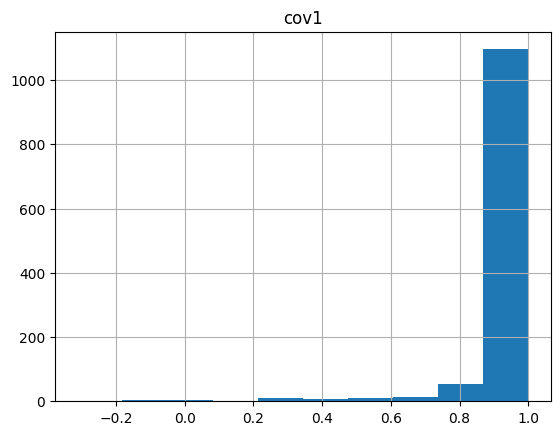

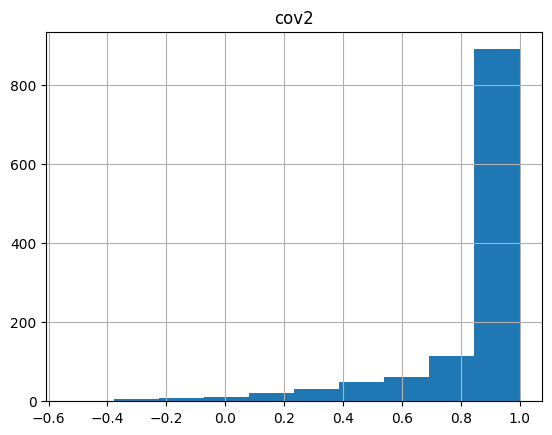

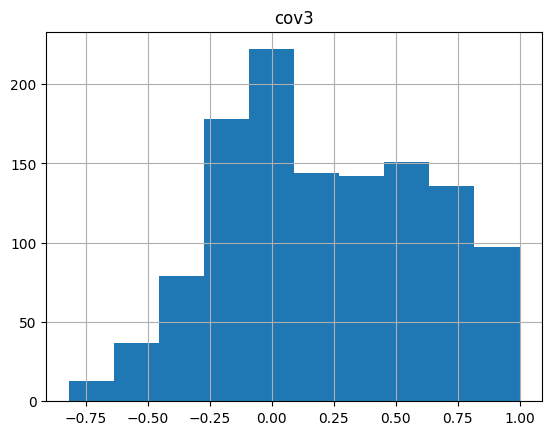

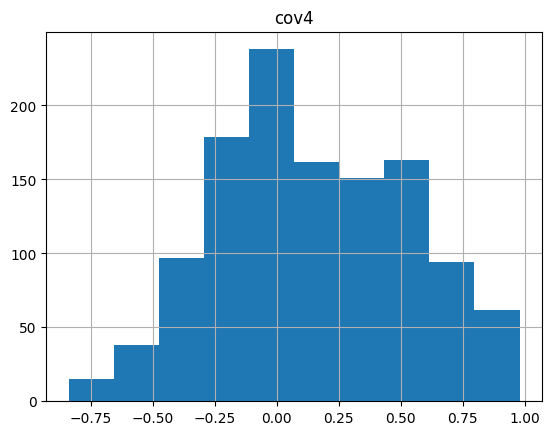

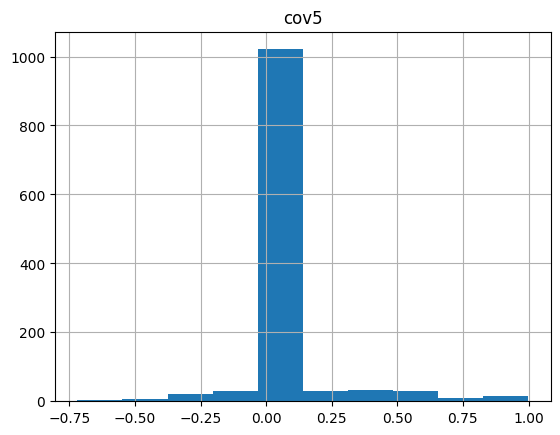

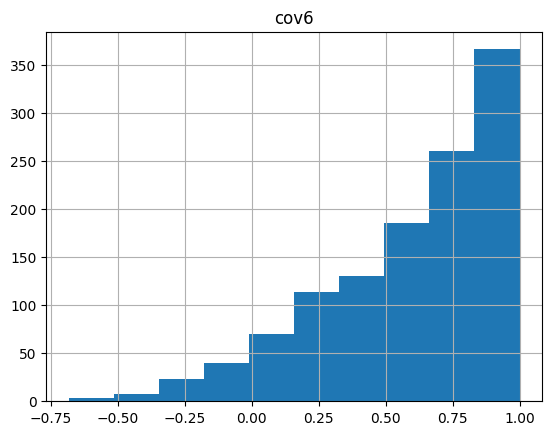

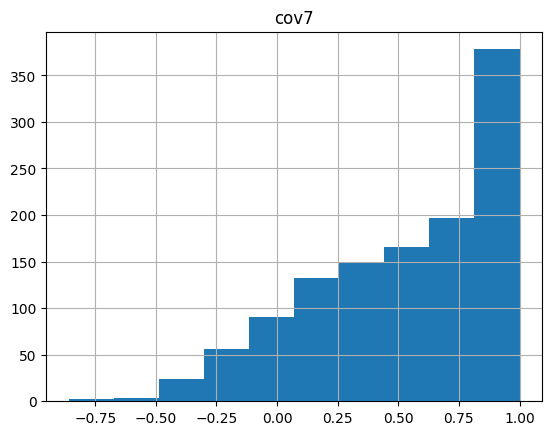

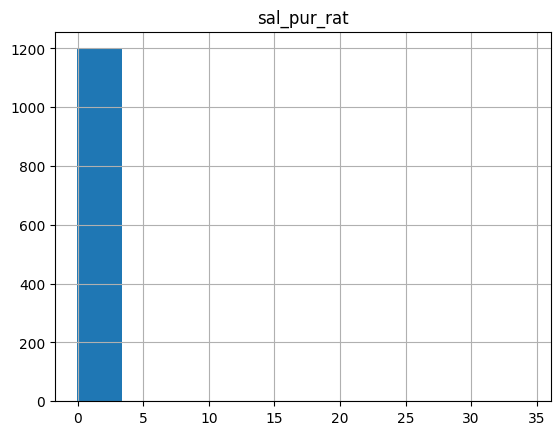

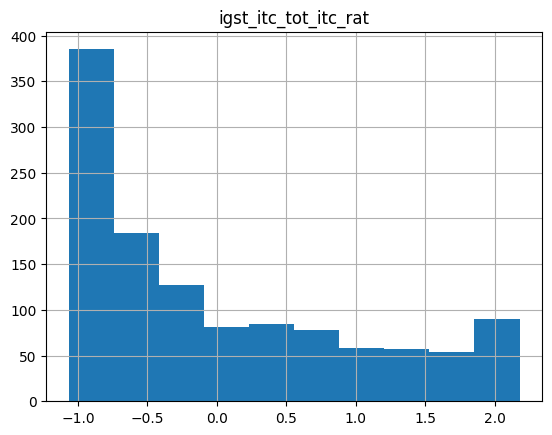

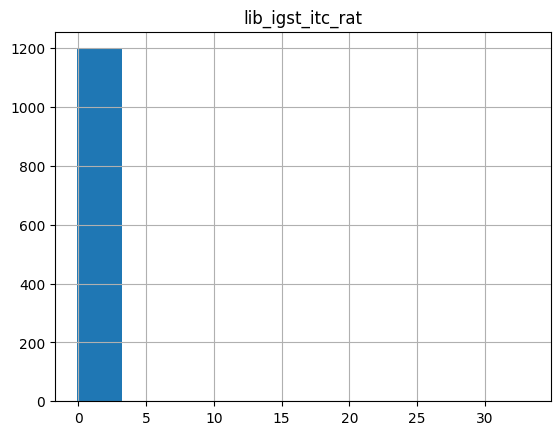


Boxplots:


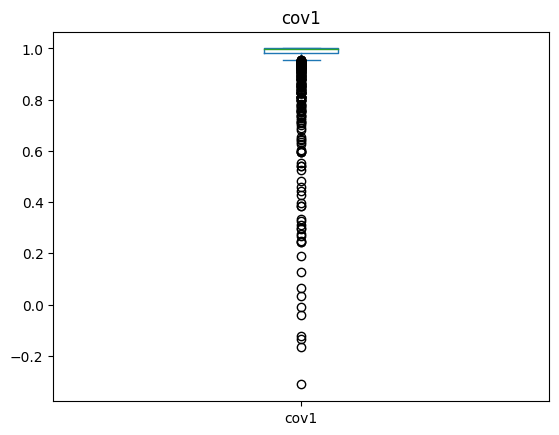

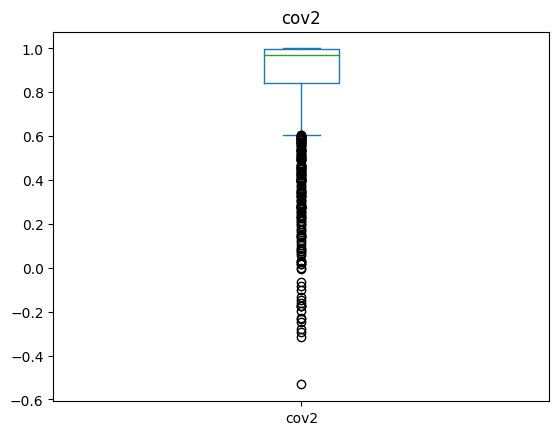

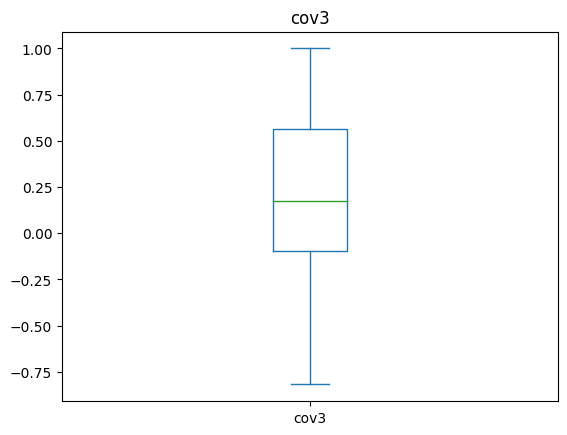

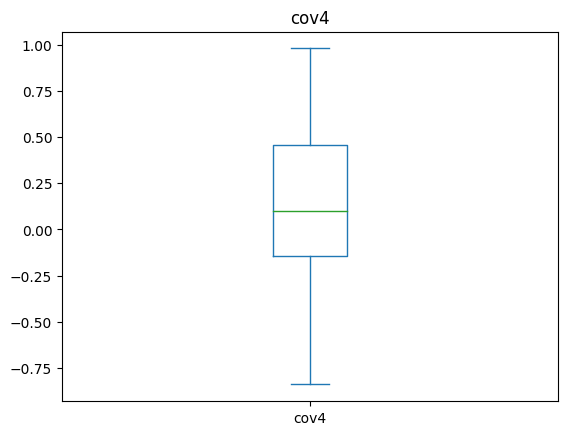

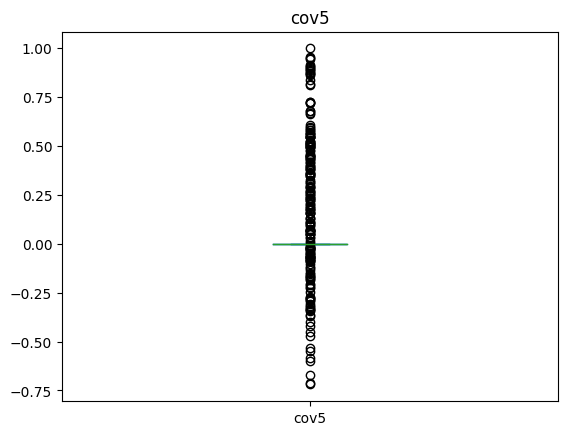

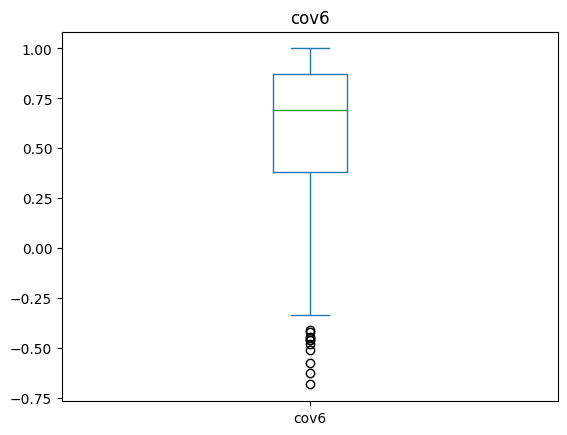

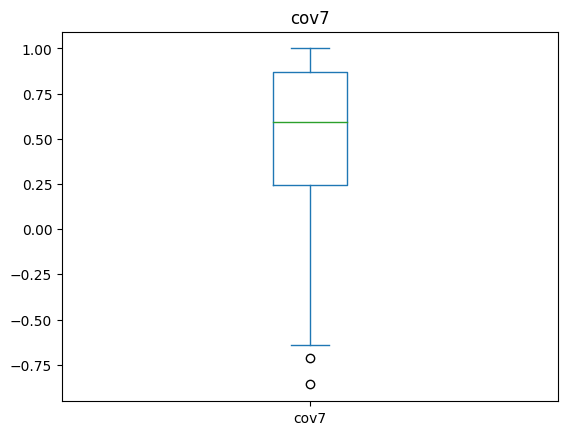

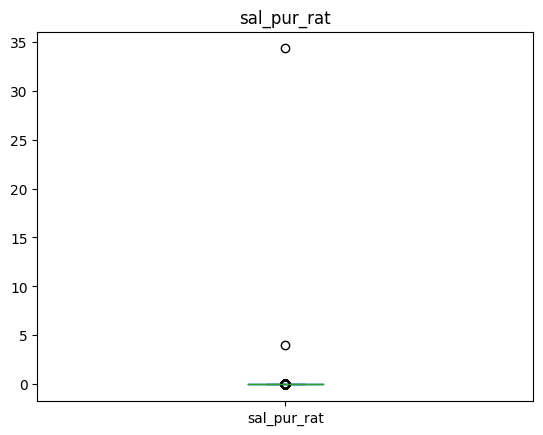

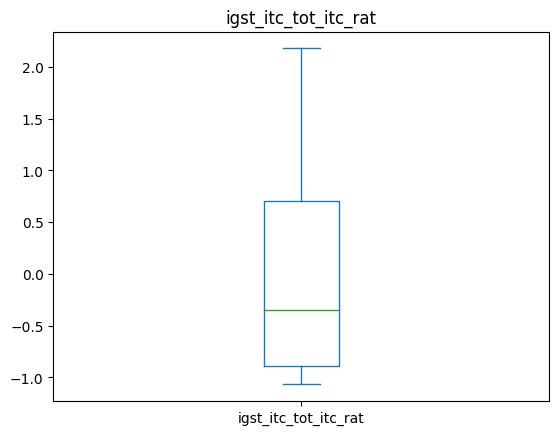

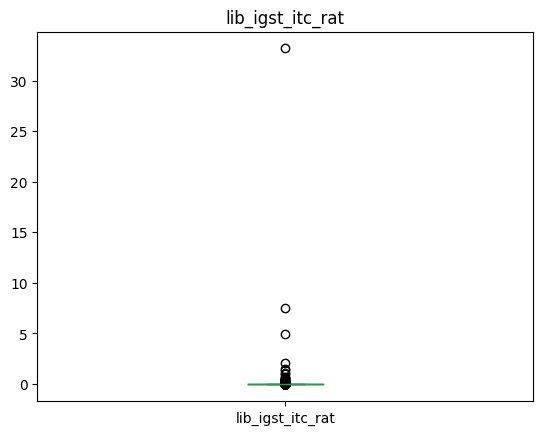

In [2]:
# Load the data into a pandas DataFrame
dataset = pd.read_csv('data.csv')

## Basic statistics
print("Basic statistics:")
print(dataset.describe(include='all'))

## Missing values
print("\nMissing values:")
print(dataset.isnull().sum())

## Unique values
print("\nUnique values:")
print(dataset.nunique())

## Correlations
print("\nCorrelations:")
print(dataset.corr())

## Value frequency
print("\nValue frequency:")
for col in dataset.columns:
    print(dataset[col].value_counts())

## Histograms
print("\nHistograms:")
for col in dataset.columns:
    dataset[col].hist()
    plt.title(col)
    plt.show()

## Boxplots
print("\nBoxplots:")
for col in dataset.columns:
    dataset[col].plot(kind='box')
    plt.title(col)
    plt.show()

In [3]:
# Dataset statistics
print("Dataset statistics:")
print(f"Number of variables:\t\t{len(dataset.columns)}")
print(f"Number of observations:\t\t{len(dataset)}")
print(f"Missing cells:\t\t\t{dataset.isnull().sum().sum()}")
print(f"Missing cells (%):\t\t{dataset.isnull().sum().sum() / (len(dataset) * len(dataset.columns)):.1%}")
duplicated_rows = dataset[dataset.duplicated()]
print(f"Duplicate rows:\t\t\t{len(duplicated_rows)}")
print(f"Duplicate rows (%):\t\t{len(duplicated_rows) / len(dataset):.1%}")
print(f"Total size in memory:\t\t{dataset.memory_usage(deep=True).sum() / (1024*1024):.1f} MiB")
print(f"Average record size in memory:\t{dataset.memory_usage(deep=True).sum() / len(dataset):.1f} B")

Dataset statistics:
Number of variables:		10
Number of observations:		1199
Missing cells:			0
Missing cells (%):		0.0%
Duplicate rows:			0
Duplicate rows (%):		0.0%
Total size in memory:		0.1 MiB
Average record size in memory:	80.1 B


In [4]:
# Variables statistics
for col in dataset.columns:
    print(f"\nVariable: {col}")
    print(f"Distinct:\t{dataset[col].nunique()}")
    print(f"Distinct (%):\t{dataset[col].nunique() / len(dataset):.1%}")
    print(f"Missing:\t{dataset[col].isnull().sum()}")
    print(f"Missing (%):\t{dataset[col].isnull().sum() / len(dataset):.1%}")
    print(f"Infinite:\t{np.isinf(dataset[col]).sum()}")
    print(f"Infinite (%):\t{np.isinf(dataset[col]).sum() / len(dataset):.1%}")
    print(f"Mean:\t\t{dataset[col].mean()}")
    print(f"Minimum:\t{dataset[col].min()}")
    print(f"Maximum:\t{dataset[col].max()}")
    print(f"Zeros:\t\t{len(dataset[dataset[col] == 0])}")
    print(f"Zeros (%):\t{len(dataset[dataset[col] == 0]) / len(dataset):.1%}")
    print(f"Negative:\t{len(dataset[dataset[col] < 0])}")
    print(f"Negative (%):\t{len(dataset[dataset[col] < 0]) / len(dataset):.1%}")
    print(f"Memory size:\t{dataset[col].memory_usage(deep=True) / (1024):.1f} KiB")


Variable: cov1
Distinct:	1017
Distinct (%):	84.8%
Missing:	0
Missing (%):	0.0%
Infinite:	0
Infinite (%):	0.0%
Mean:		0.9568963754637198
Minimum:	-0.312219463
Maximum:	1.0
Zeros:		0
Zeros (%):	0.0%
Negative:	6
Negative (%):	0.5%
Memory size:	9.5 KiB

Variable: cov2
Distinct:	1125
Distinct (%):	93.8%
Missing:	0
Missing (%):	0.0%
Infinite:	0
Infinite (%):	0.0%
Mean:		0.8557698209274397
Minimum:	-0.531958013
Maximum:	1.0
Zeros:		1
Zeros (%):	0.1%
Negative:	18
Negative (%):	1.5%
Memory size:	9.5 KiB

Variable: cov3
Distinct:	1143
Distinct (%):	95.3%
Missing:	0
Missing (%):	0.0%
Infinite:	0
Infinite (%):	0.0%
Mean:		0.21426349167055878
Minimum:	-0.818128394
Maximum:	1.0
Zeros:		57
Zeros (%):	4.8%
Negative:	388
Negative (%):	32.4%
Memory size:	9.5 KiB

Variable: cov4
Distinct:	1142
Distinct (%):	95.2%
Missing:	0
Missing (%):	0.0%
Infinite:	0
Infinite (%):	0.0%
Mean:		0.14735870045704755
Minimum:	-0.83915785
Maximum:	0.979015216
Zeros:		58
Zeros (%):	4.8%
Negative:	444
Negative (%):	37.0%
Mem

Variable: cov1



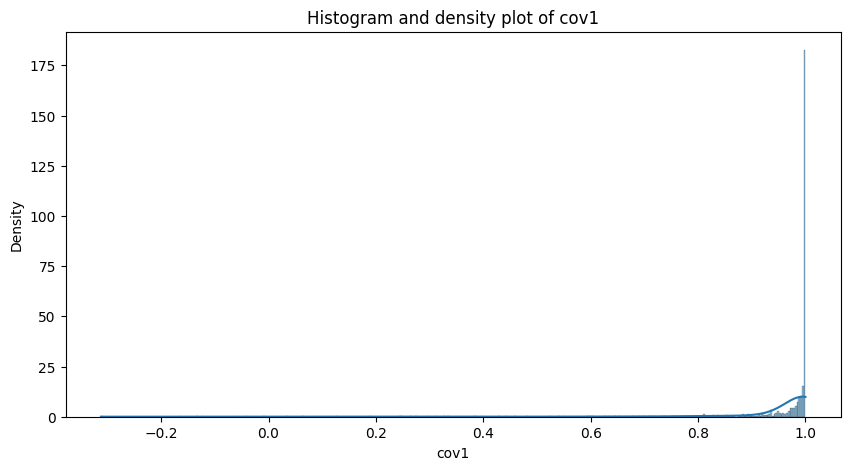

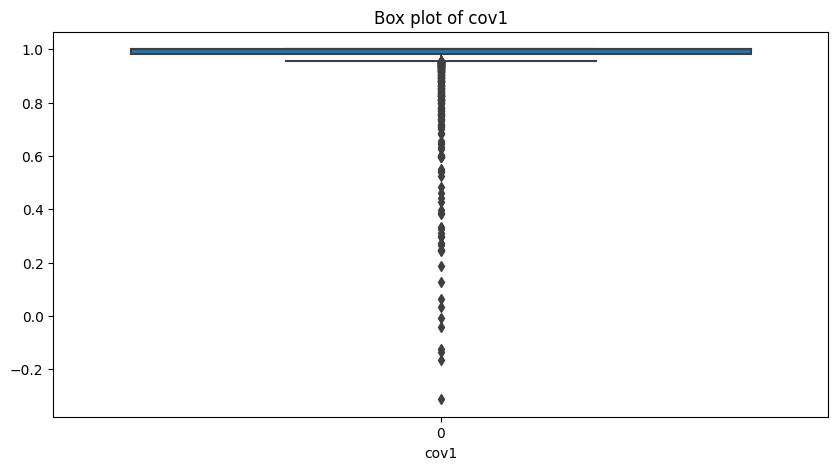

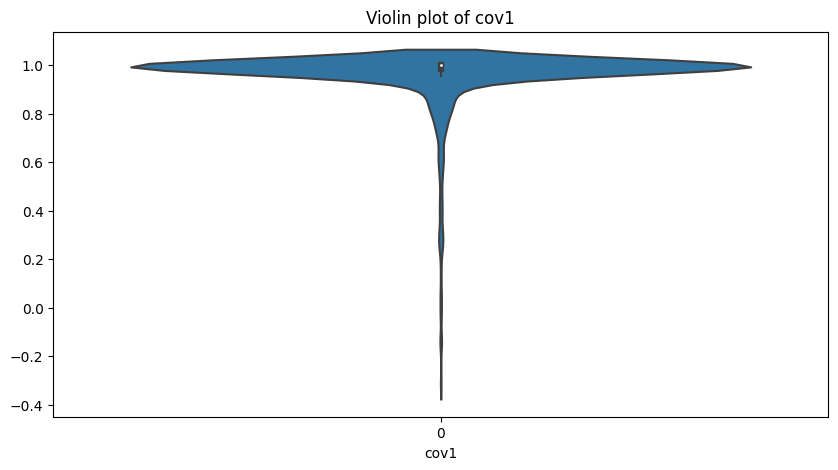

Variable: cov2



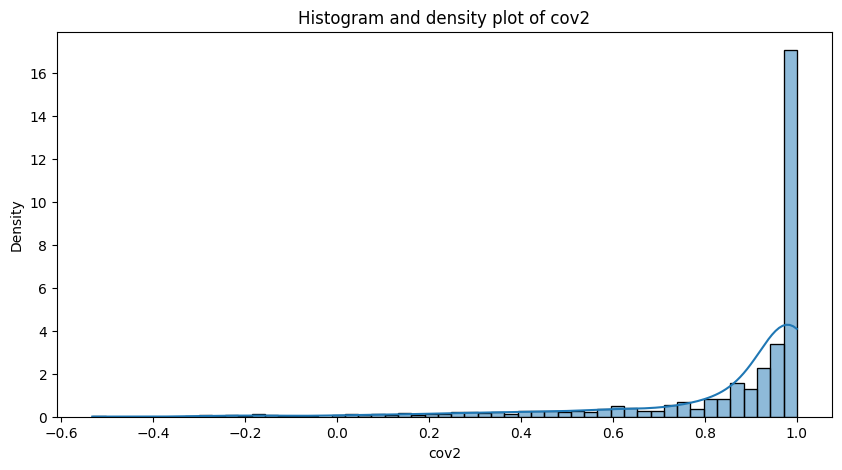

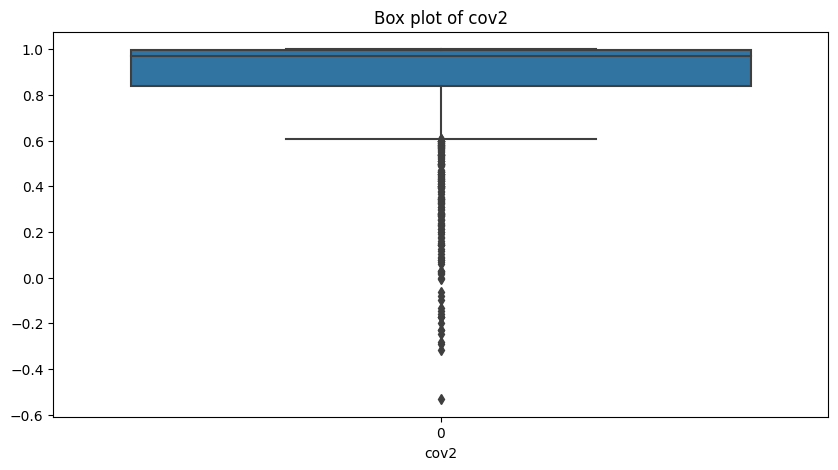

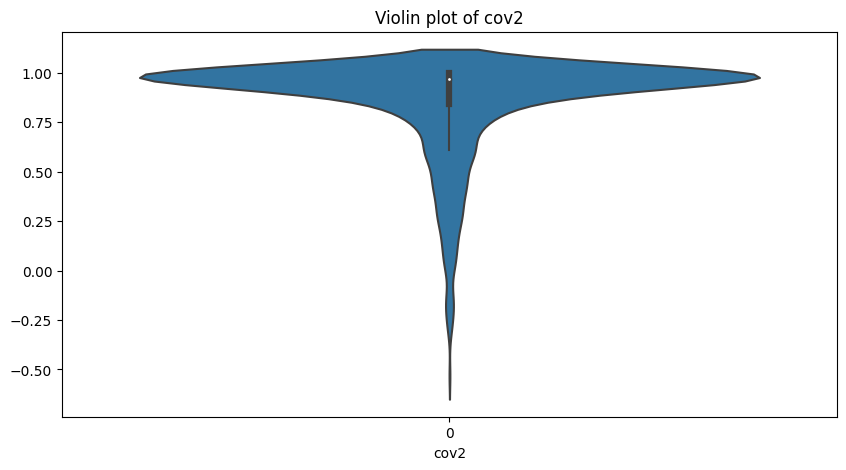

Variable: cov3



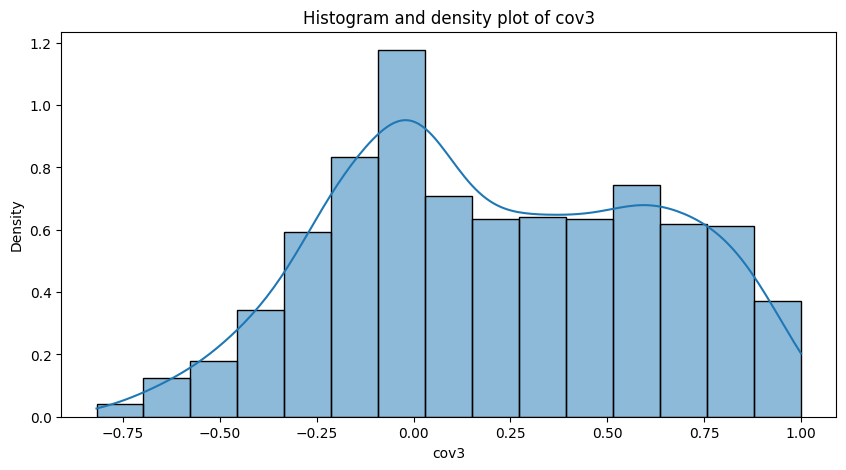

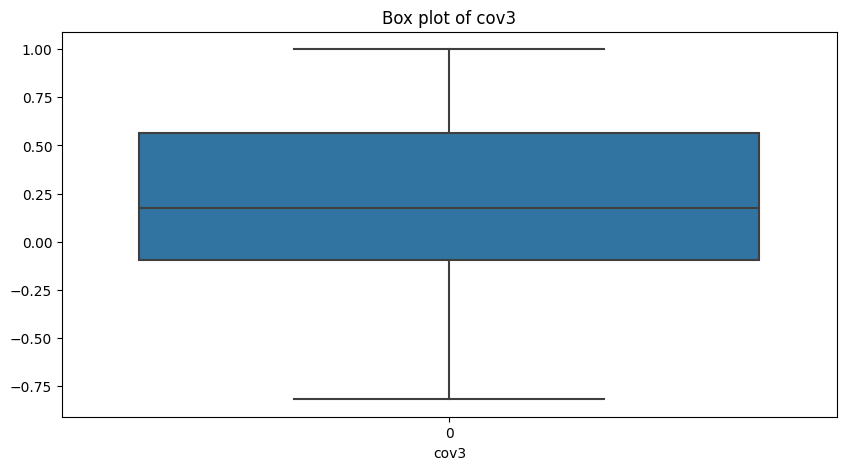

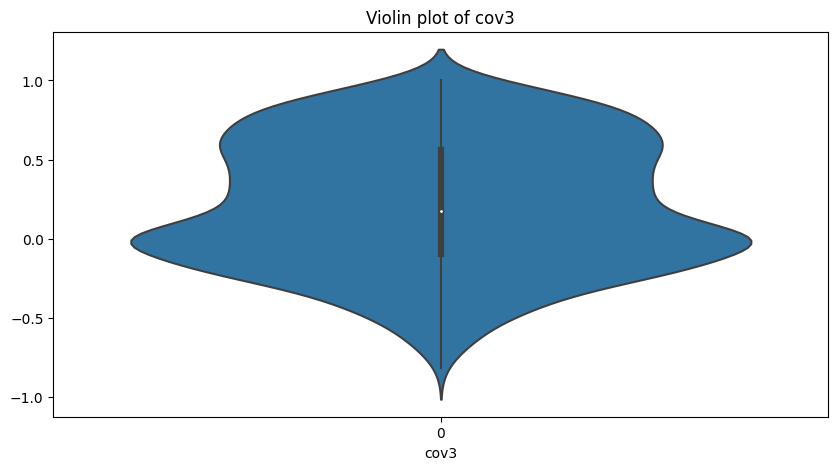

Variable: cov4



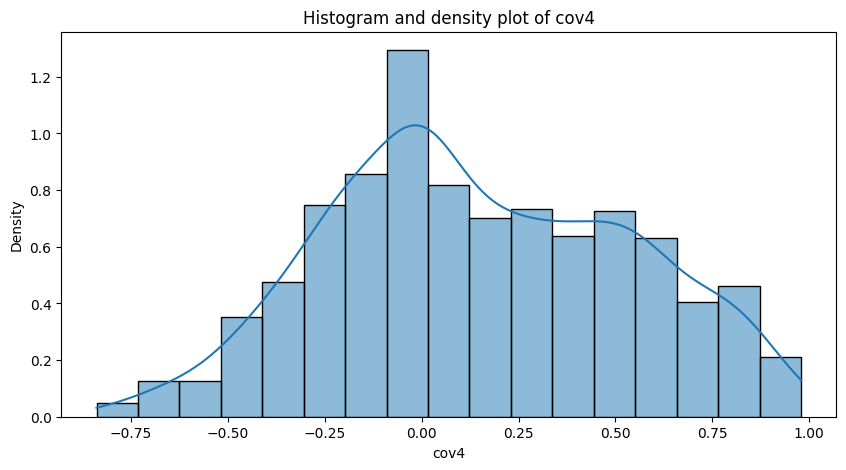

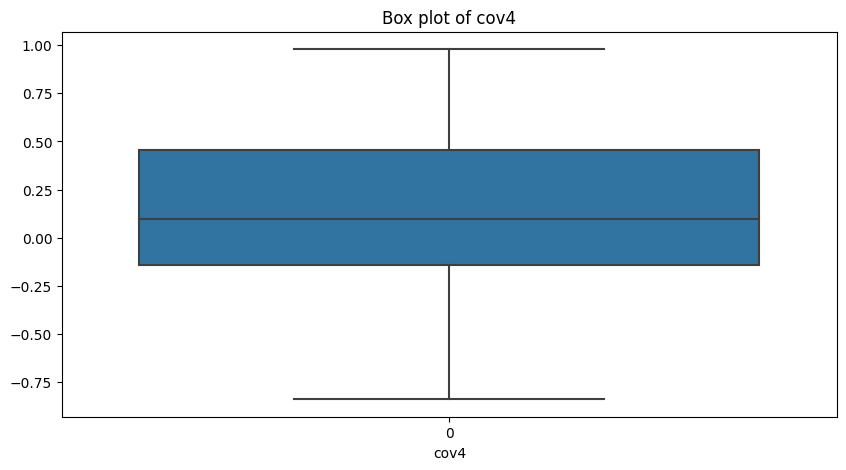

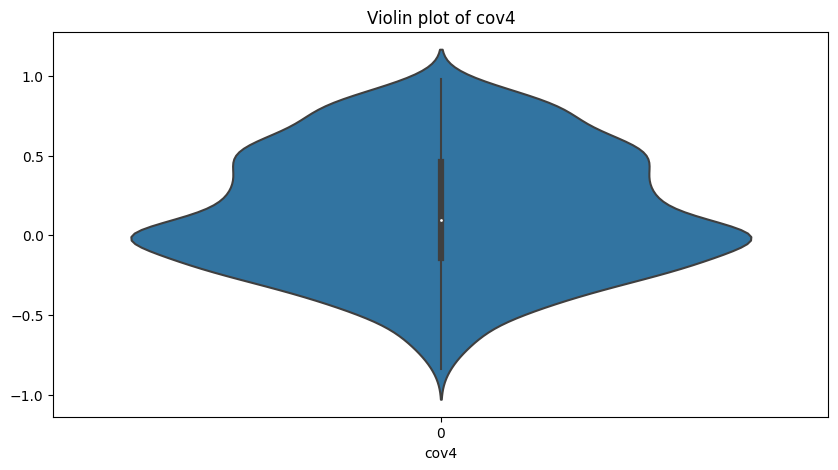

Variable: cov5



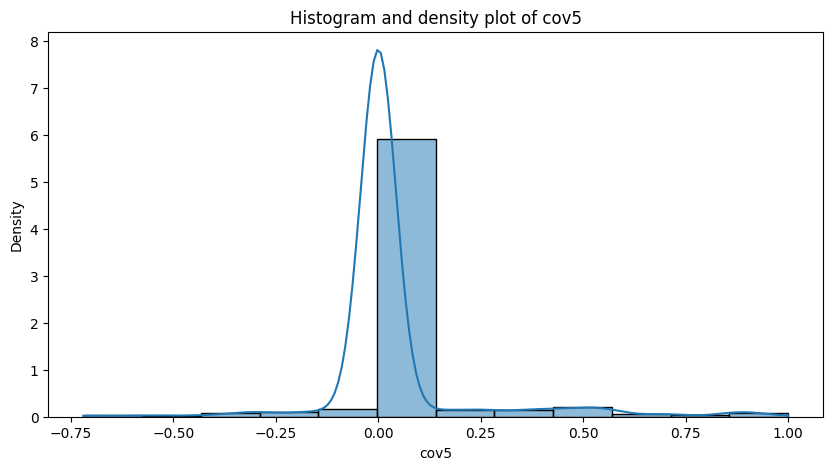

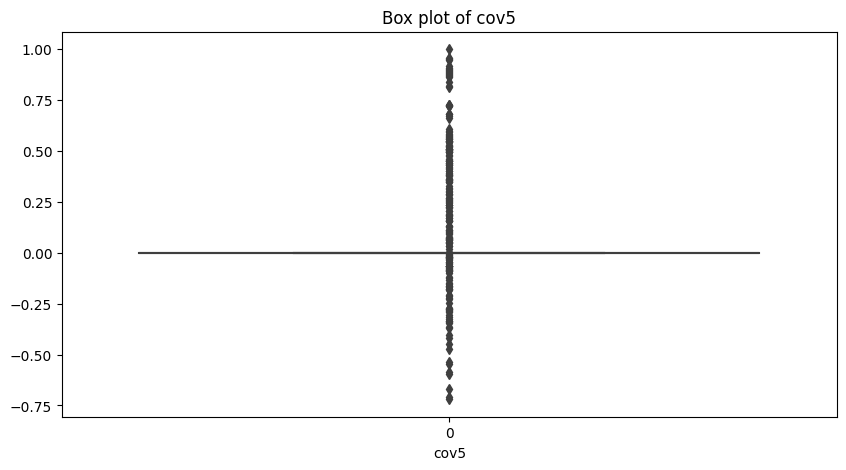

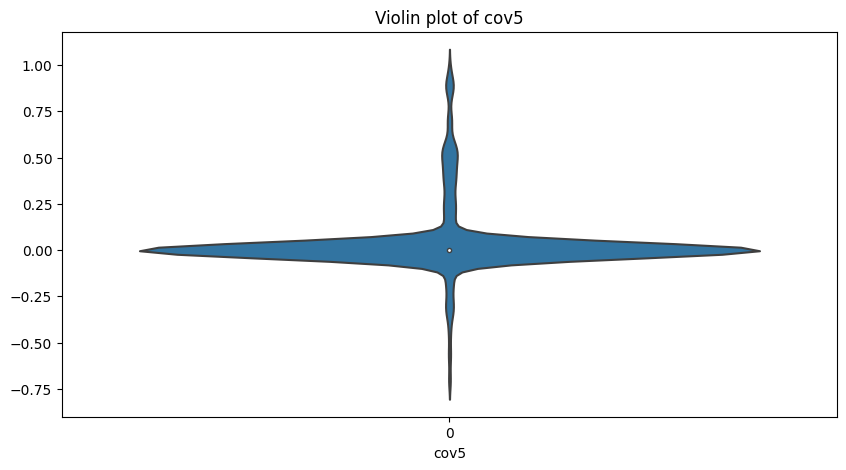

Variable: cov6



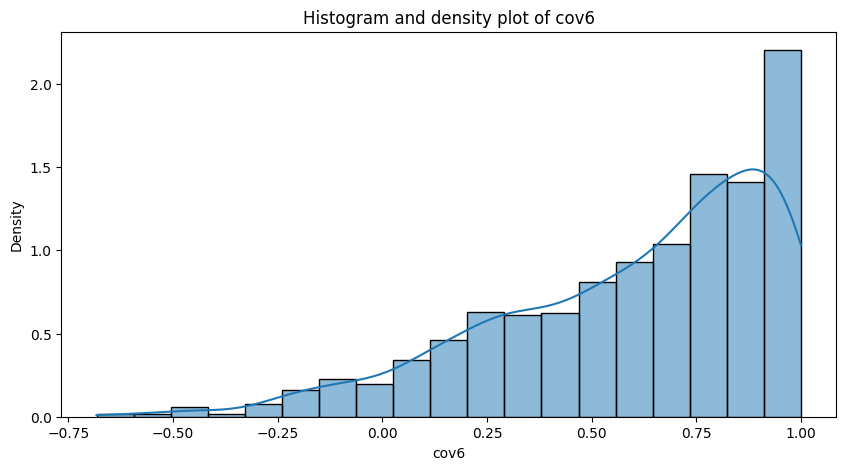

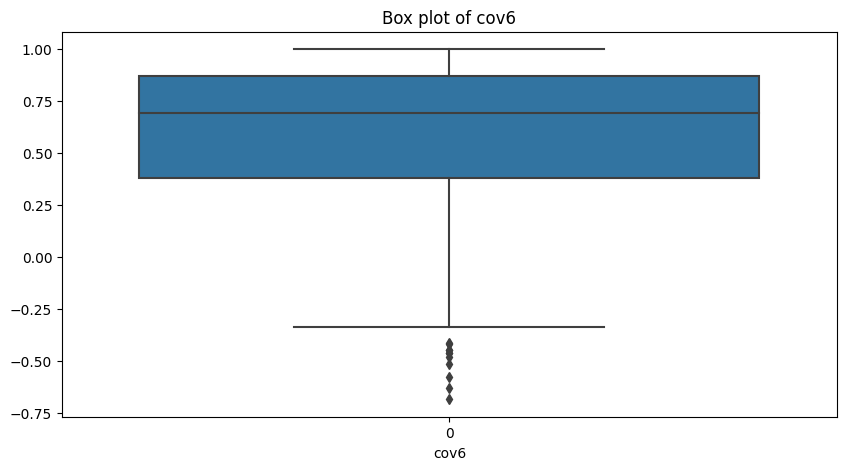

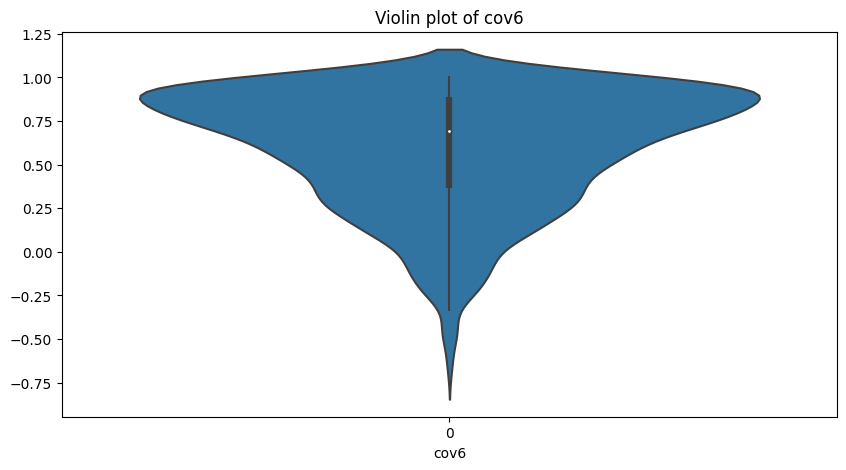

Variable: cov7



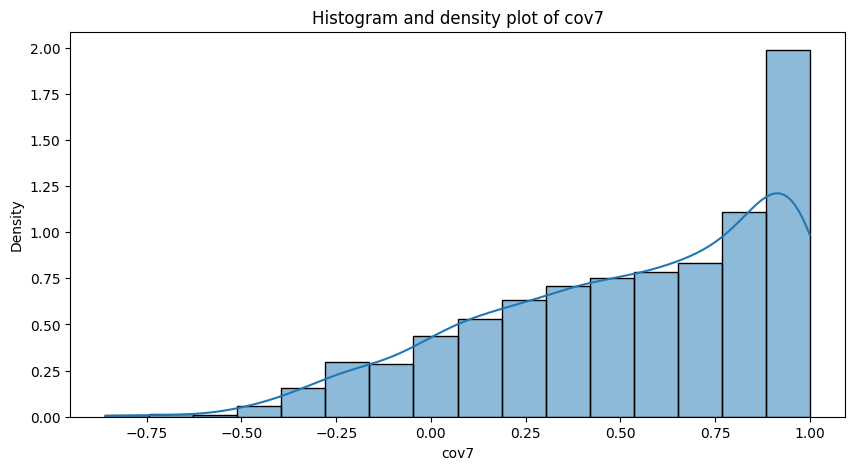

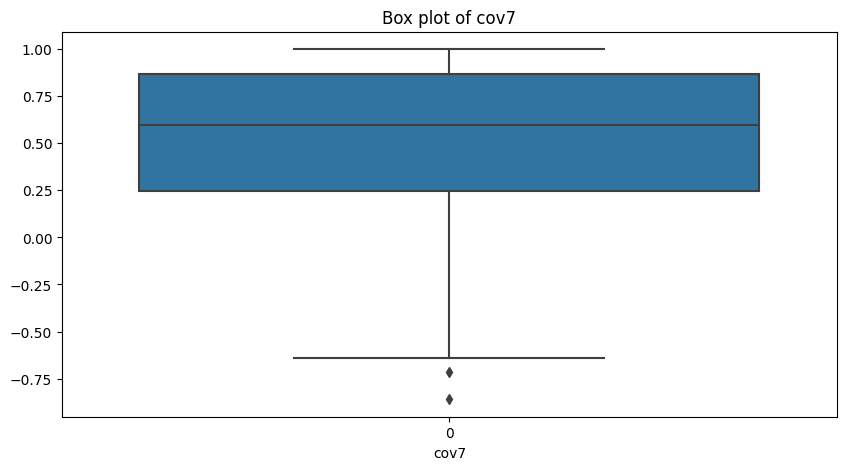

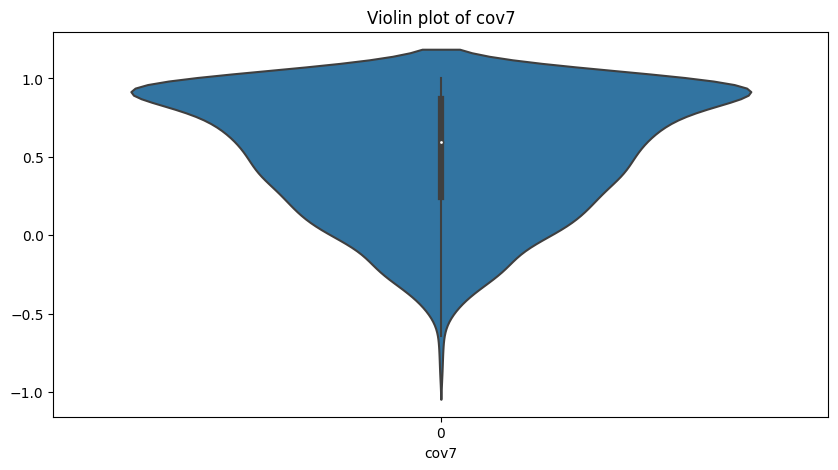

Variable: sal_pur_rat



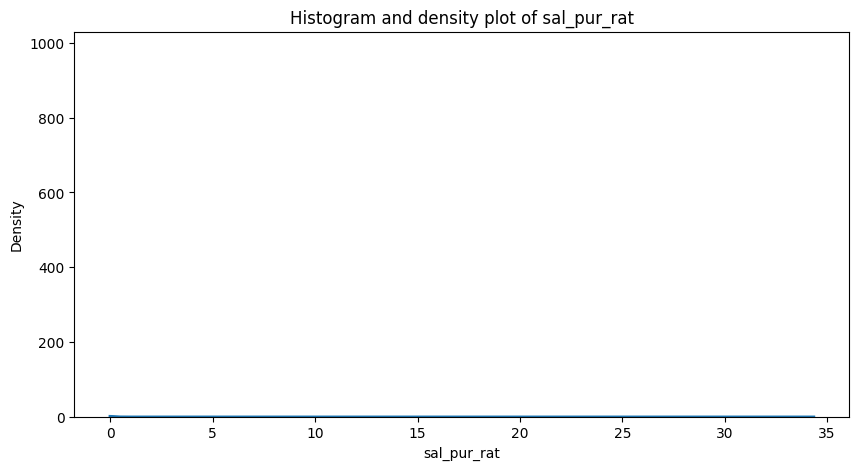

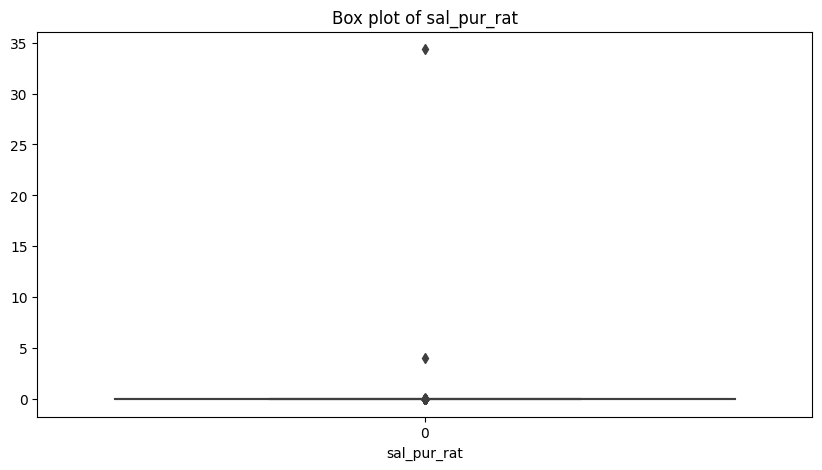

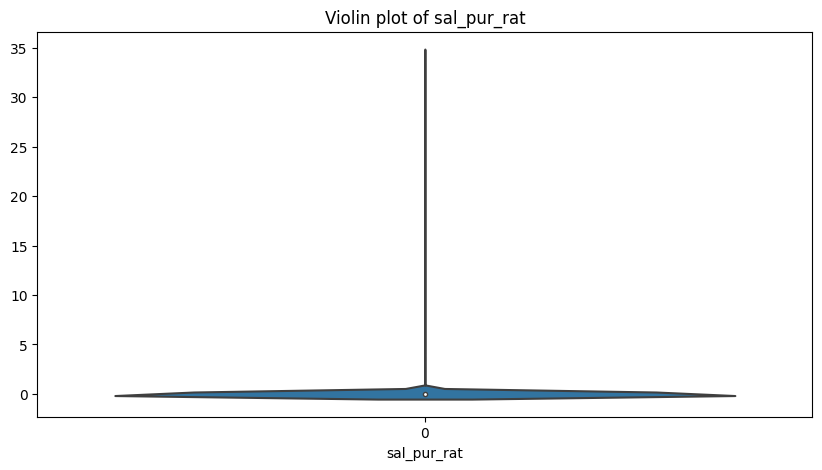

Variable: igst_itc_tot_itc_rat



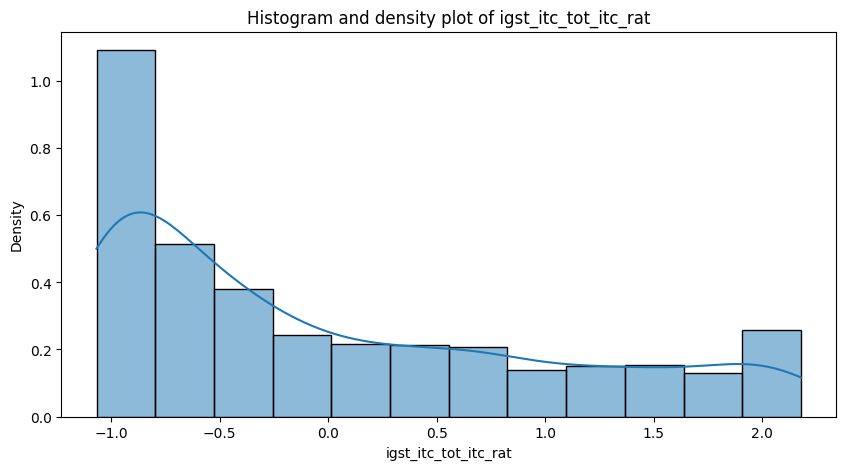

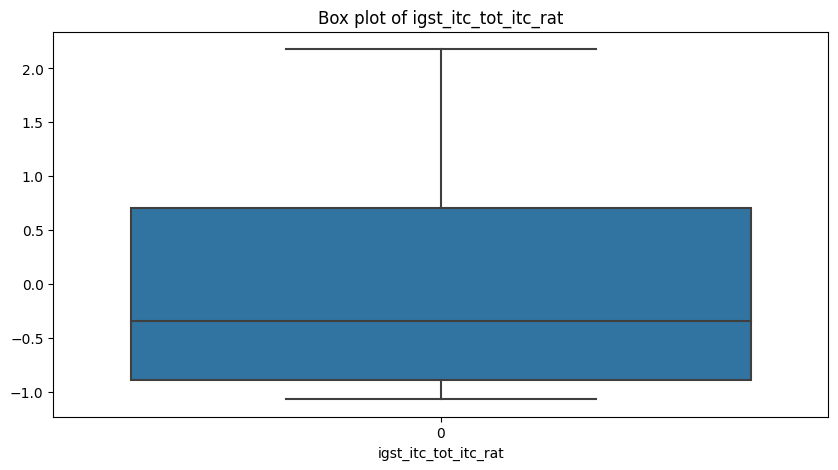

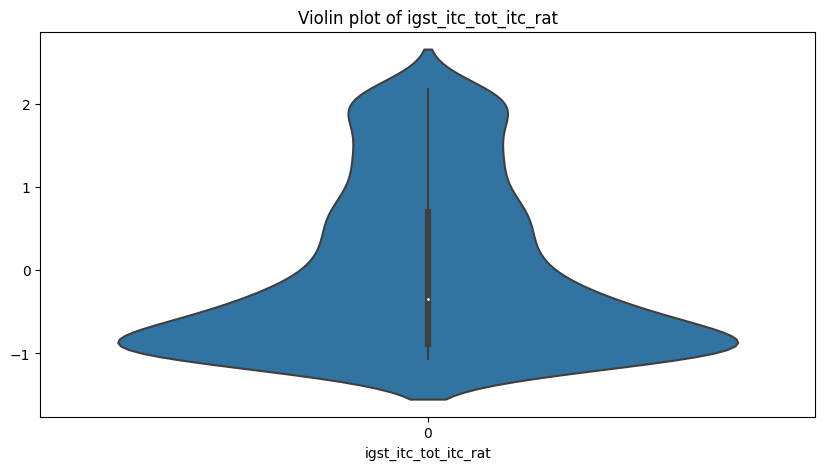

Variable: lib_igst_itc_rat



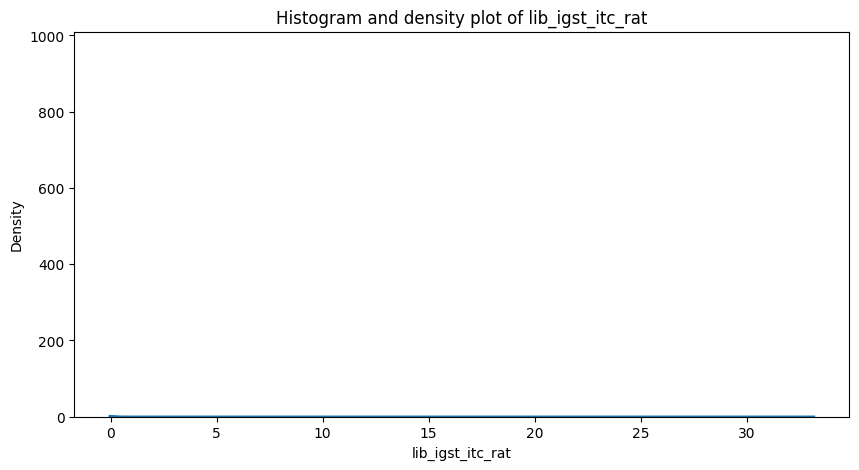

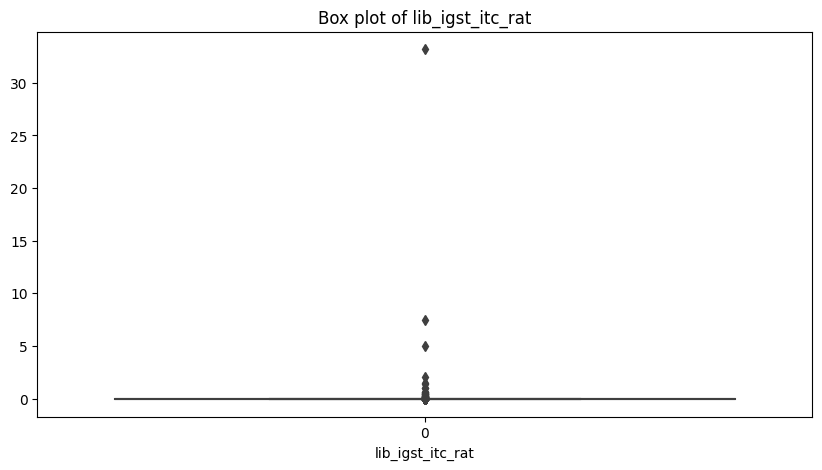

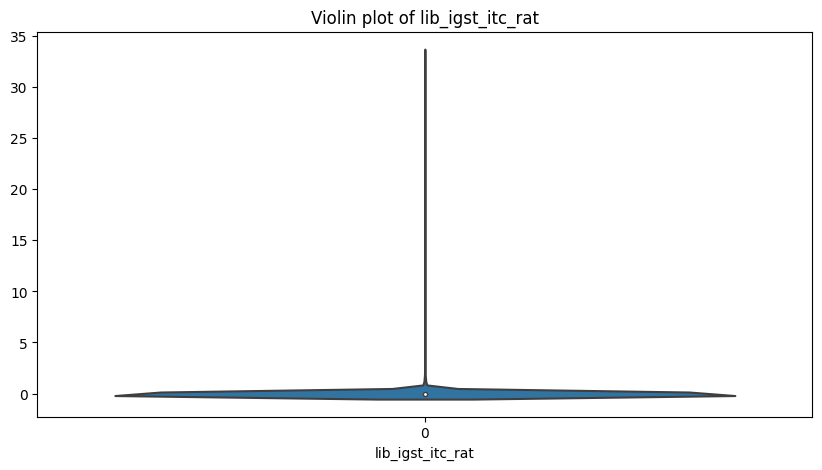

In [ ]:
# Visualizations for each variable
for col in dataset.columns:
    print(f"Variable: {col}\n")
    
    # Histogram and density plot
    plt.figure(figsize=(10, 5))
    sns.histplot(dataset[col], kde=True, stat="density")
    plt.title(f"Histogram and density plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    
    # Box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(dataset[col])
    plt.title(f"Box plot of {col}")
    plt.xlabel(col)
    plt.show()
    
    # Violin plot
    plt.figure(figsize=(10, 5))
    sns.violinplot(dataset[col])
    plt.title(f"Violin plot of {col}")
    plt.xlabel(col)
    plt.show()

Interaction between cov1 and cov2


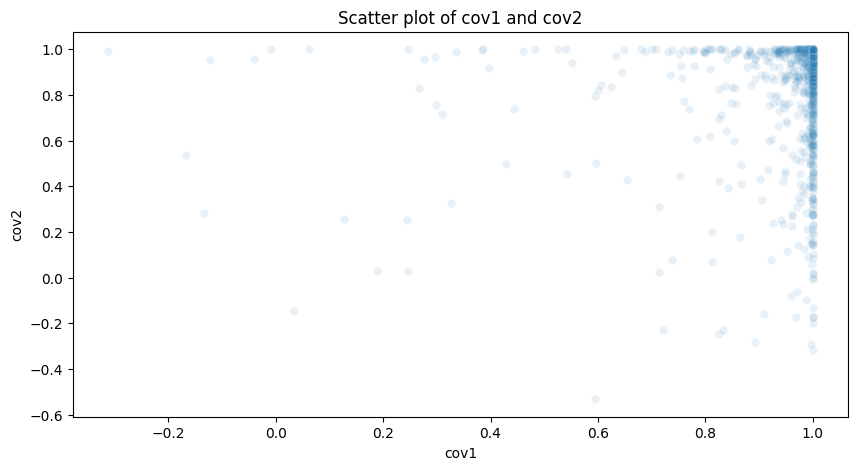

Correlation coefficients:
Spearman's correlation:	0.154
Pearson's correlation:	0.157
Kendall's correlation:	0.106
Missing values:
cov1    0
cov2    0
dtype: int64


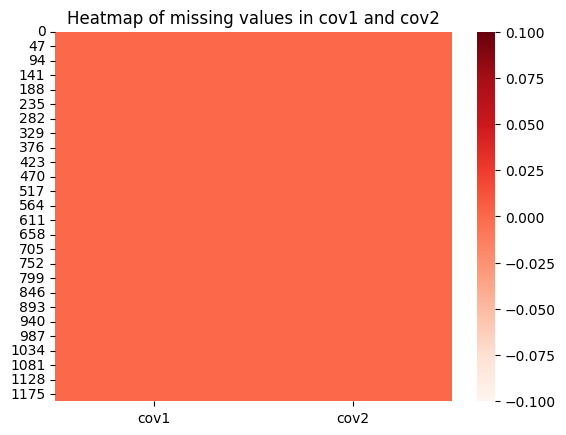

Duplicate rows:		20

Interaction between cov1 and cov3


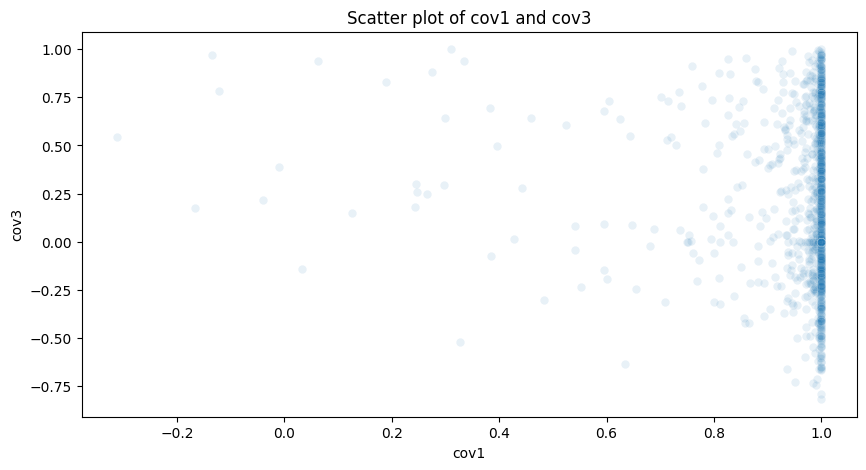

Correlation coefficients:
Spearman's correlation:	-0.069
Pearson's correlation:	-0.081
Kendall's correlation:	-0.046
Missing values:
cov1    0
cov3    0
dtype: int64


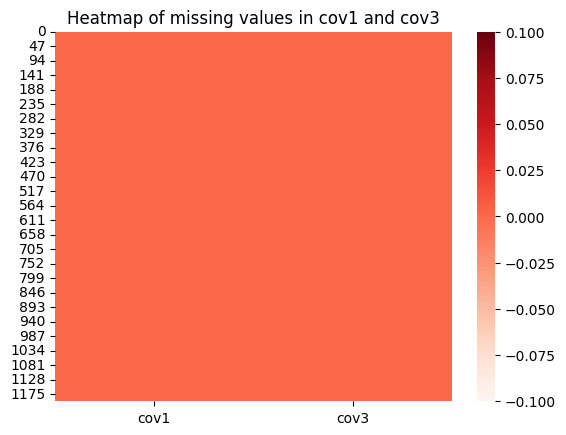

Duplicate rows:		19

Interaction between cov1 and cov4


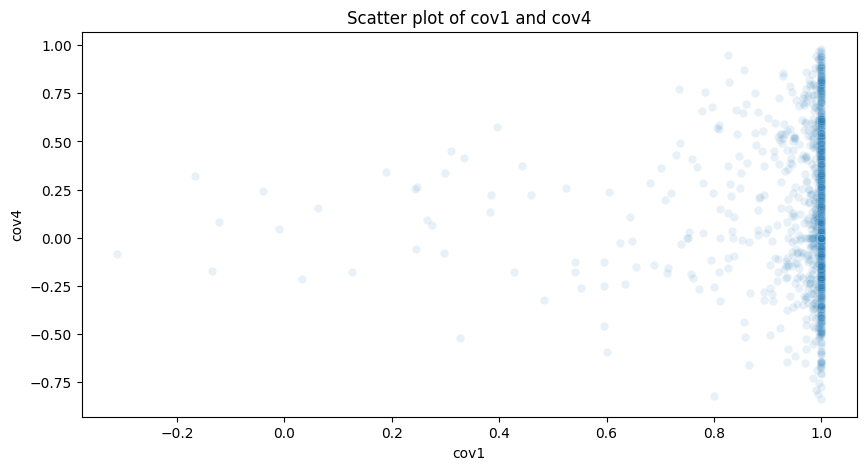

Correlation coefficients:
Spearman's correlation:	0.005
Pearson's correlation:	0.037
Kendall's correlation:	0.004
Missing values:
cov1    0
cov4    0
dtype: int64


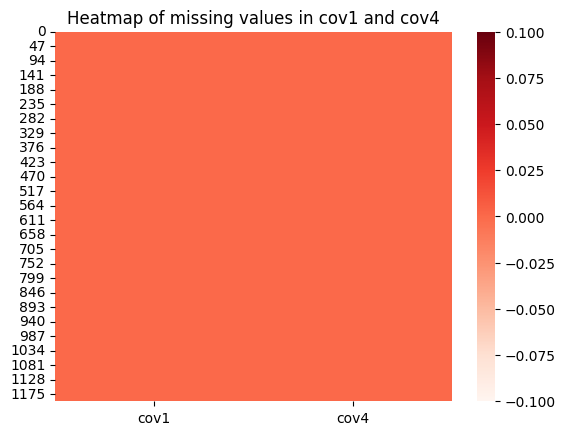

Duplicate rows:		20

Interaction between cov1 and cov5


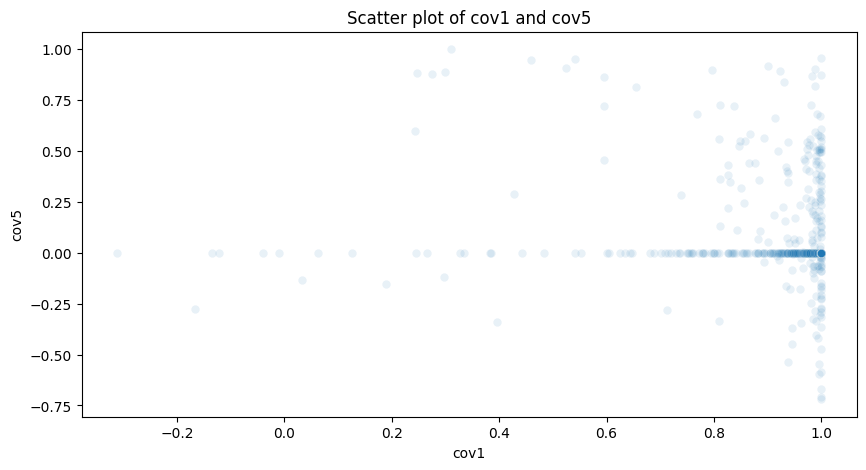

Correlation coefficients:
Spearman's correlation:	-0.184
Pearson's correlation:	-0.182
Kendall's correlation:	-0.145
Missing values:
cov1    0
cov5    0
dtype: int64


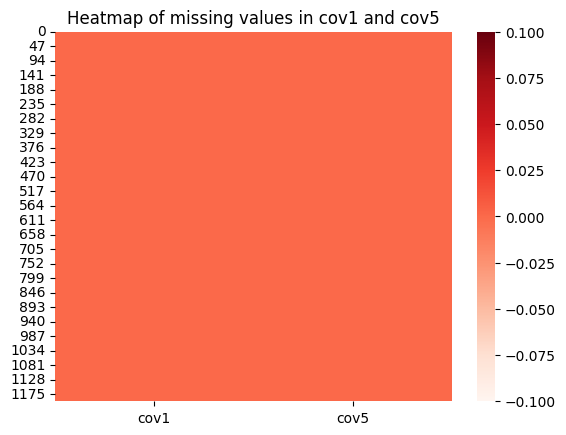

Duplicate rows:		181

Interaction between cov1 and cov6


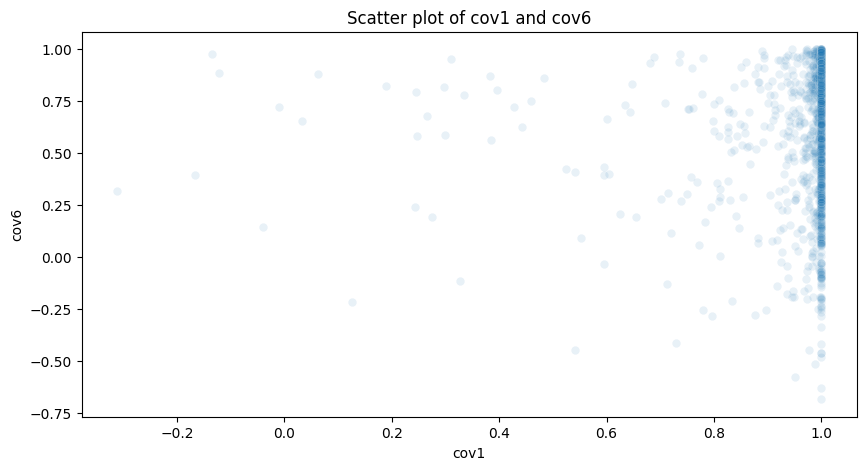

Correlation coefficients:
Spearman's correlation:	0.105
Pearson's correlation:	0.068
Kendall's correlation:	0.070
Missing values:
cov1    0
cov6    0
dtype: int64


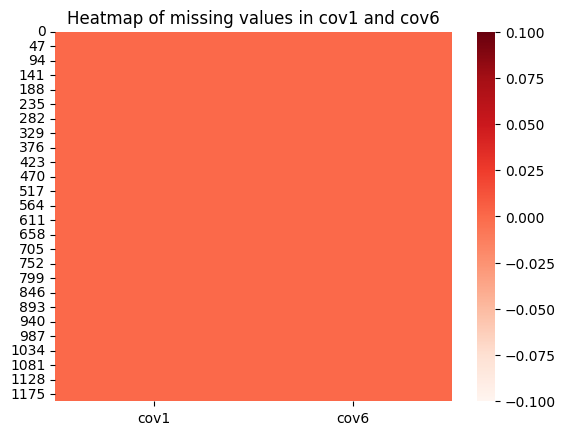

Duplicate rows:		0

Interaction between cov1 and cov7


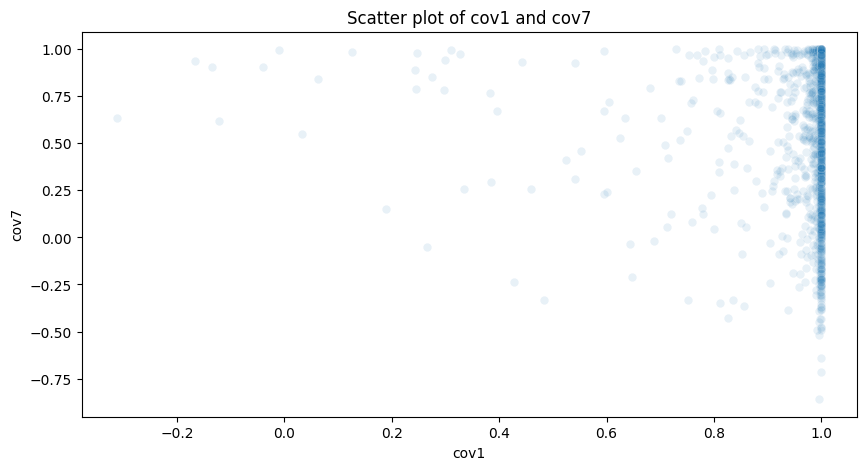

Correlation coefficients:
Spearman's correlation:	-0.096
Pearson's correlation:	-0.054
Kendall's correlation:	-0.064
Missing values:
cov1    0
cov7    0
dtype: int64


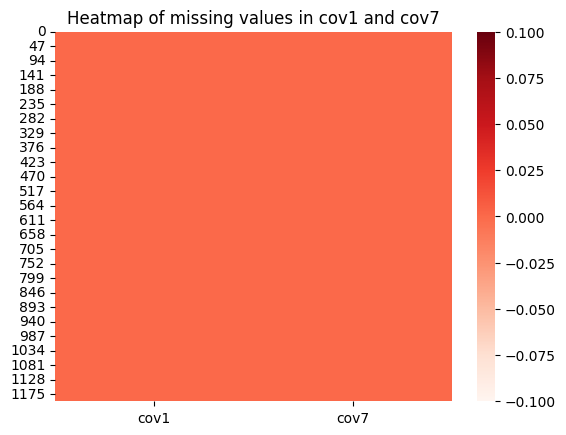

Duplicate rows:		3

Interaction between cov1 and sal_pur_rat


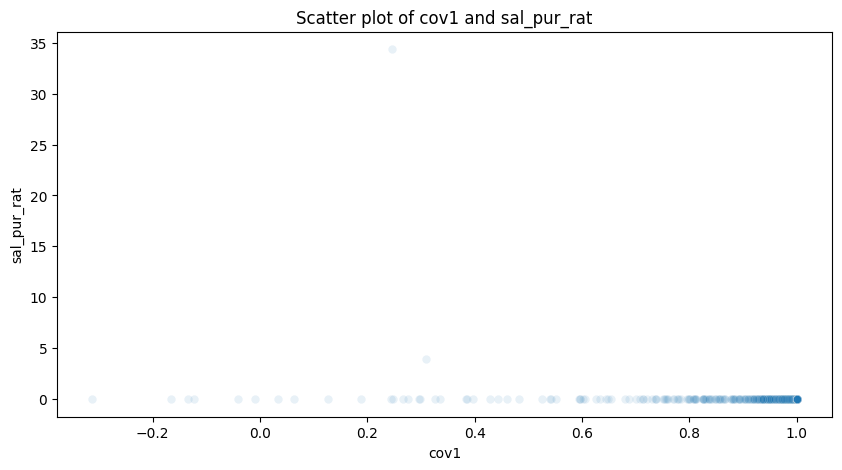

Correlation coefficients:
Spearman's correlation:	-0.151
Pearson's correlation:	-0.168
Kendall's correlation:	-0.109
Missing values:
cov1           0
sal_pur_rat    0
dtype: int64


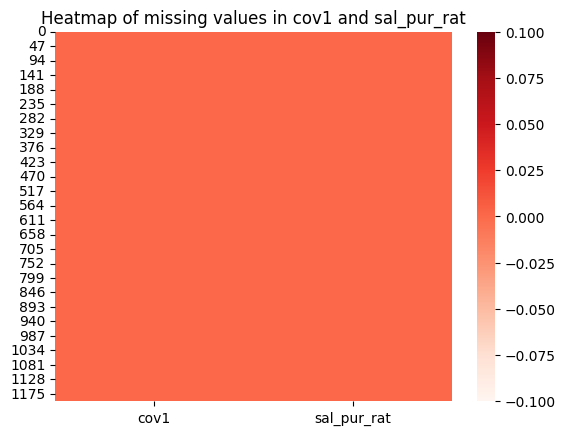

Duplicate rows:		0

Interaction between cov1 and igst_itc_tot_itc_rat


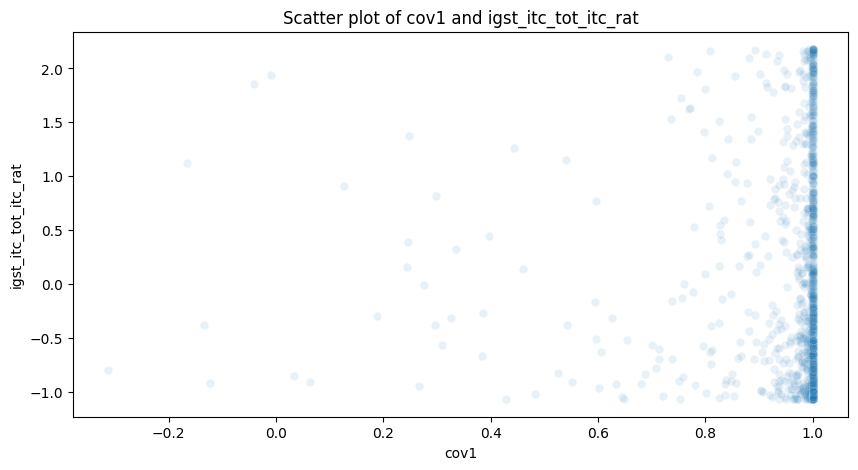

Correlation coefficients:
Spearman's correlation:	-0.112
Pearson's correlation:	-0.007
Kendall's correlation:	-0.076
Missing values:
cov1                    0
igst_itc_tot_itc_rat    0
dtype: int64


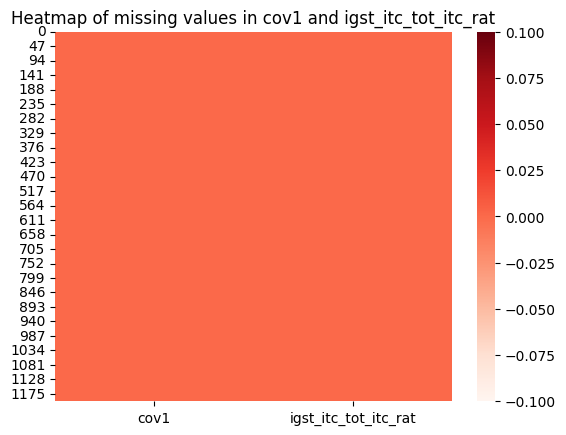

Duplicate rows:		2

Interaction between cov1 and lib_igst_itc_rat


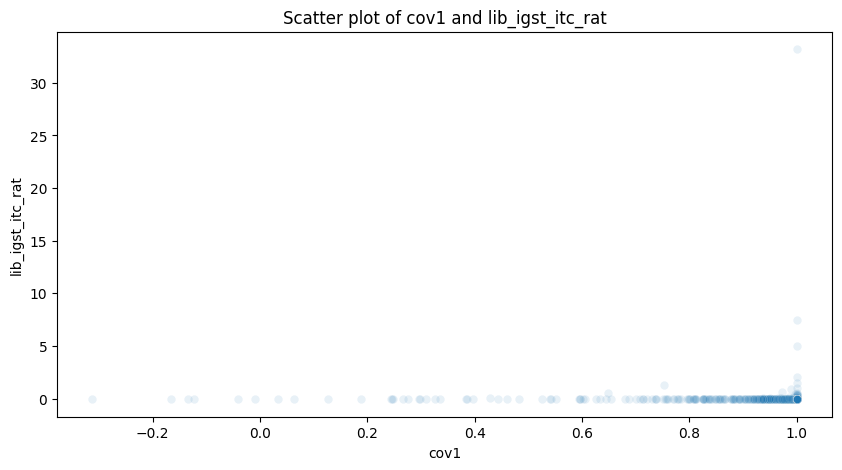

Correlation coefficients:
Spearman's correlation:	0.093
Pearson's correlation:	0.012
Kendall's correlation:	0.063
Missing values:
cov1                0
lib_igst_itc_rat    0
dtype: int64


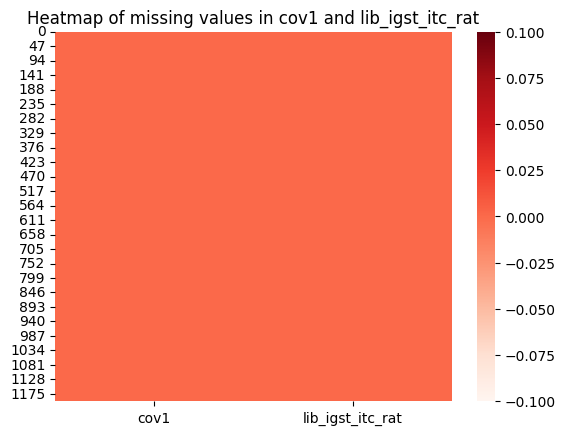

Duplicate rows:		0

Interaction between cov2 and cov3


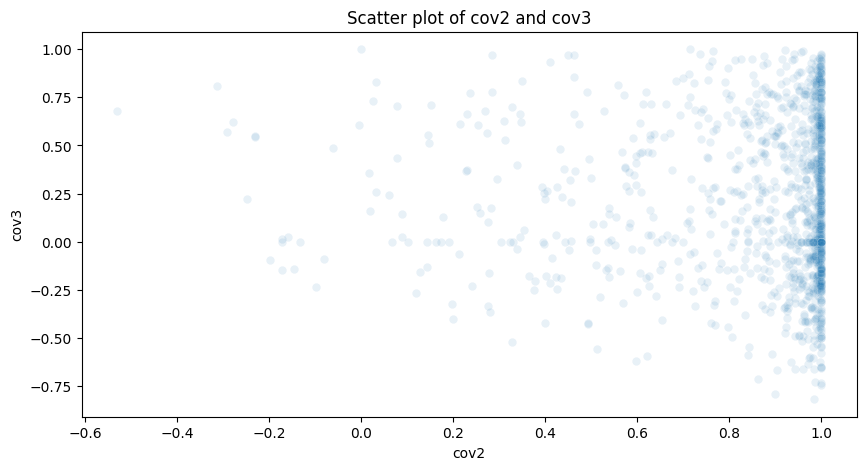

Correlation coefficients:
Spearman's correlation:	-0.027
Pearson's correlation:	-0.022
Kendall's correlation:	-0.017
Missing values:
cov2    0
cov3    0
dtype: int64


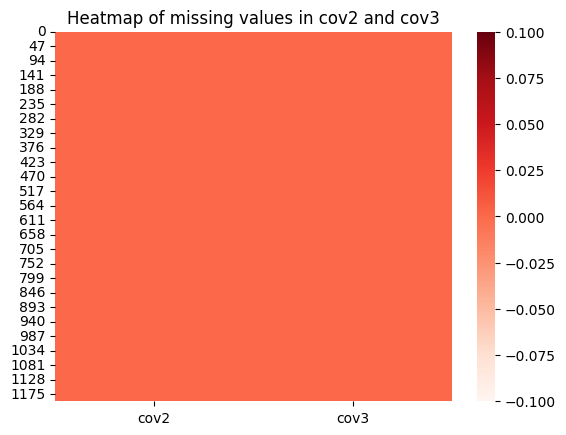

Duplicate rows:		2

Interaction between cov2 and cov4


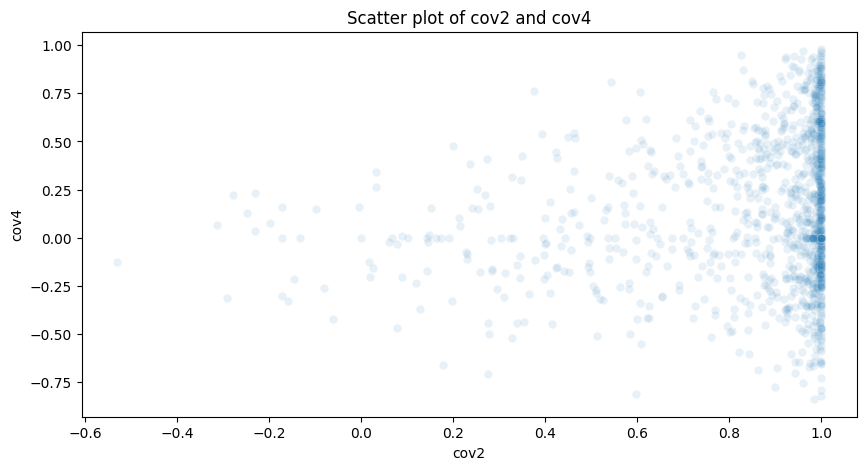

Correlation coefficients:
Spearman's correlation:	0.126
Pearson's correlation:	0.164
Kendall's correlation:	0.086
Missing values:
cov2    0
cov4    0
dtype: int64


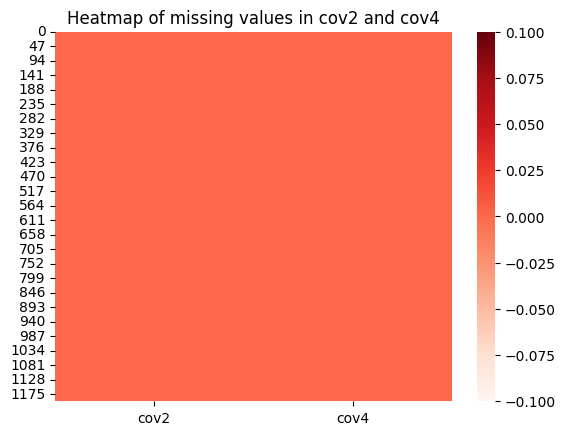

Duplicate rows:		2

Interaction between cov2 and cov5


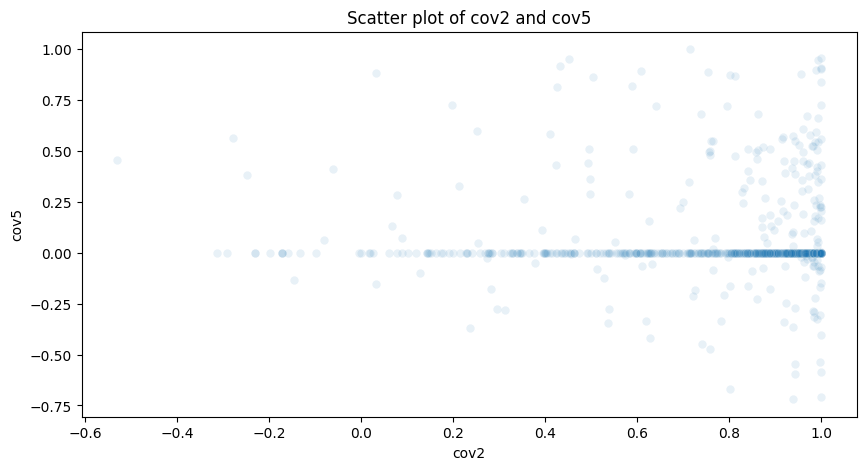

Correlation coefficients:
Spearman's correlation:	-0.073
Pearson's correlation:	-0.088
Kendall's correlation:	-0.058
Missing values:
cov2    0
cov5    0
dtype: int64


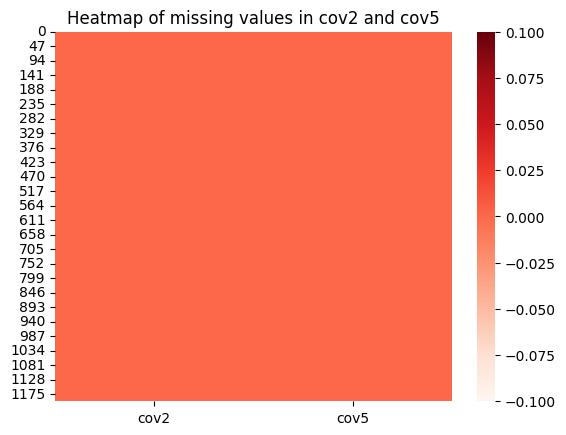

Duplicate rows:		72

Interaction between cov2 and cov6


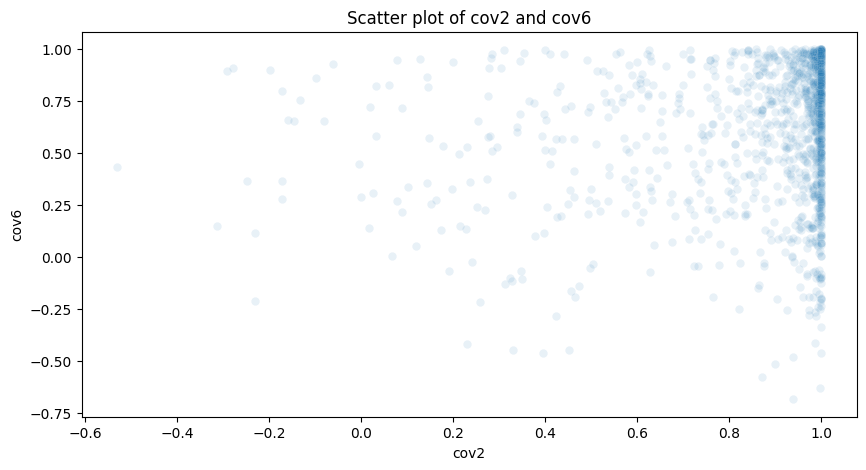

Correlation coefficients:
Spearman's correlation:	0.145
Pearson's correlation:	0.150
Kendall's correlation:	0.098
Missing values:
cov2    0
cov6    0
dtype: int64


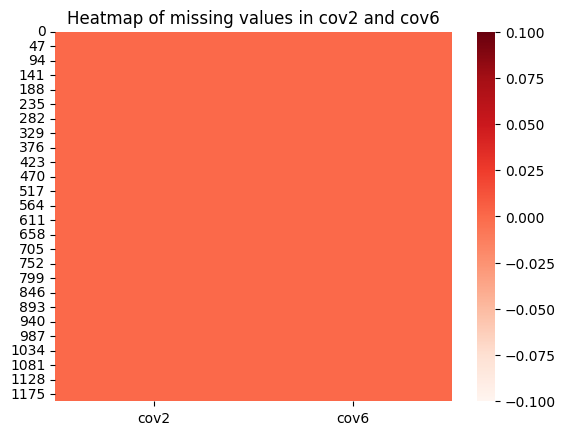

Duplicate rows:		0

Interaction between cov2 and cov7


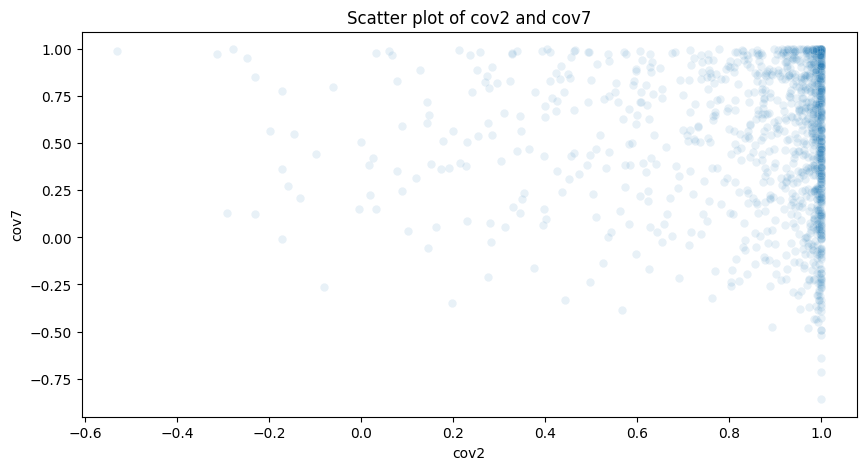

Correlation coefficients:
Spearman's correlation:	-0.017
Pearson's correlation:	-0.009
Kendall's correlation:	-0.011
Missing values:
cov2    0
cov7    0
dtype: int64


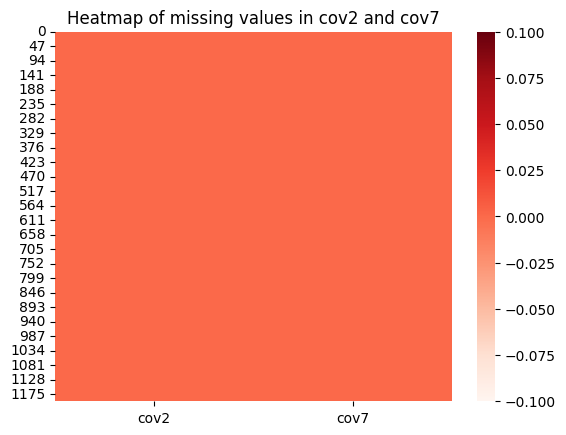

Duplicate rows:		0

Interaction between cov2 and sal_pur_rat


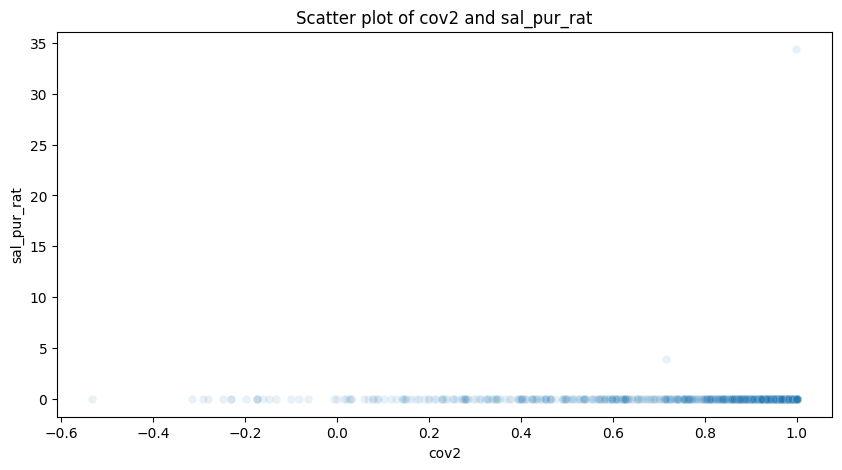

Correlation coefficients:
Spearman's correlation:	-0.227
Pearson's correlation:	0.015
Kendall's correlation:	-0.155
Missing values:
cov2           0
sal_pur_rat    0
dtype: int64


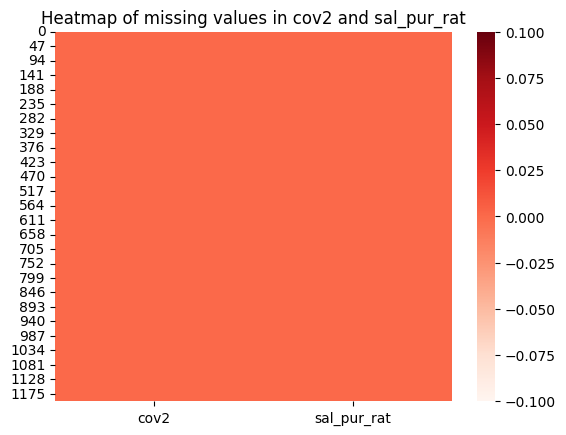

Duplicate rows:		0

Interaction between cov2 and igst_itc_tot_itc_rat


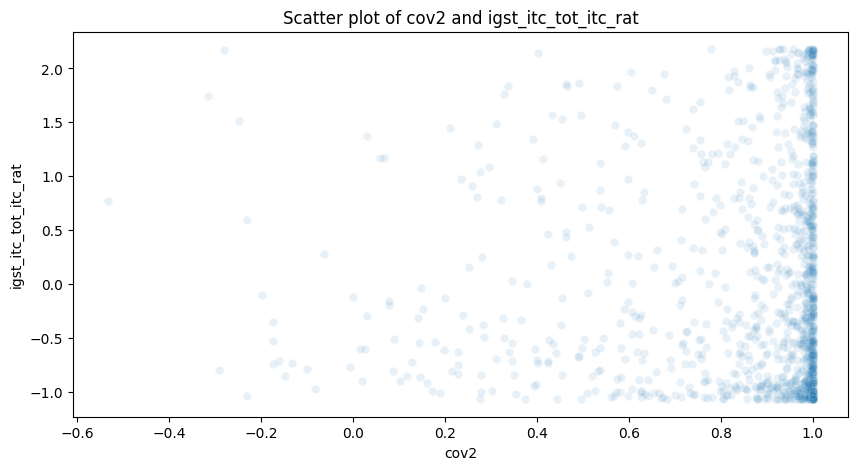

Correlation coefficients:
Spearman's correlation:	-0.023
Pearson's correlation:	0.030
Kendall's correlation:	-0.014
Missing values:
cov2                    0
igst_itc_tot_itc_rat    0
dtype: int64


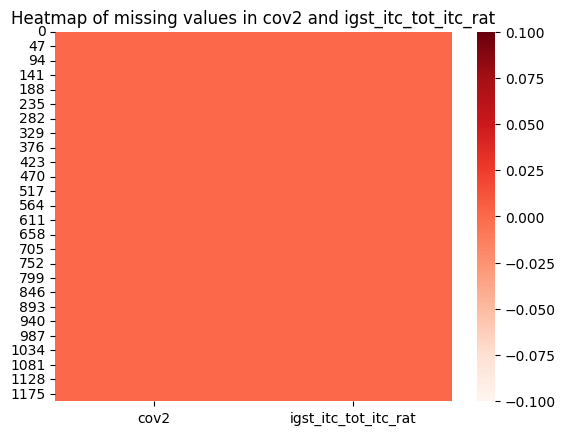

Duplicate rows:		0

Interaction between cov2 and lib_igst_itc_rat


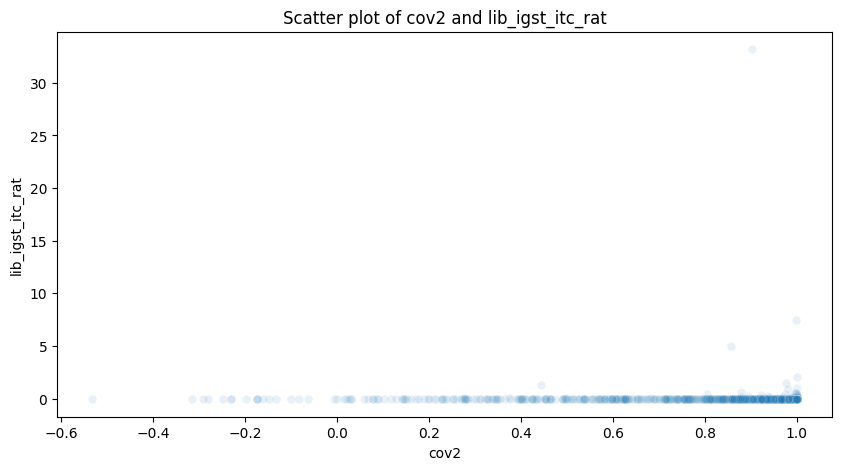

Correlation coefficients:
Spearman's correlation:	-0.001
Pearson's correlation:	0.012
Kendall's correlation:	-0.001
Missing values:
cov2                0
lib_igst_itc_rat    0
dtype: int64


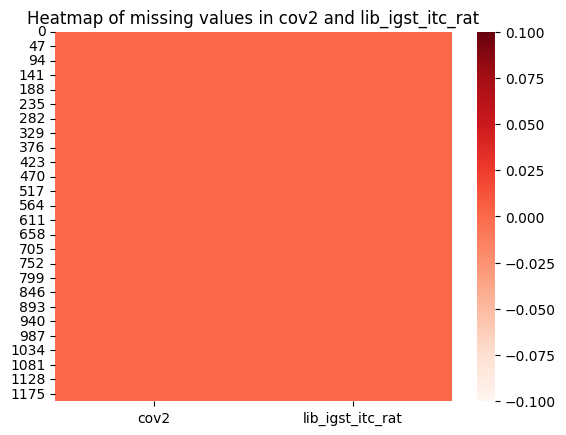

Duplicate rows:		0

Interaction between cov3 and cov4


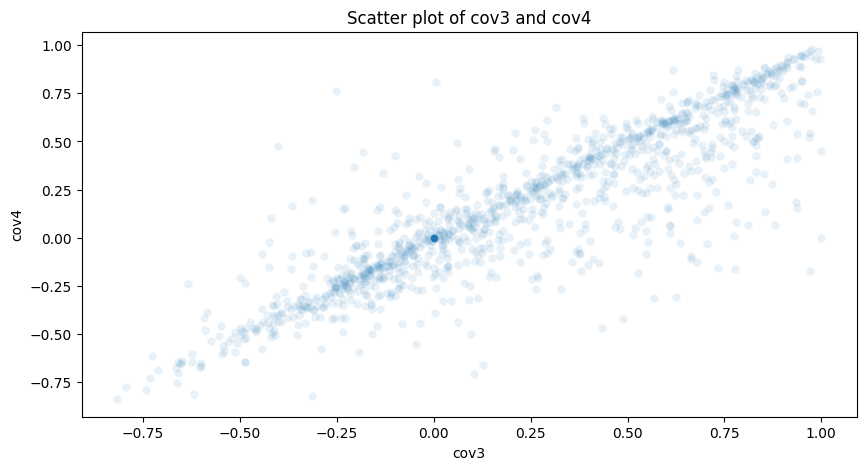

Correlation coefficients:
Spearman's correlation:	0.871
Pearson's correlation:	0.876
Kendall's correlation:	0.724
Missing values:
cov3    0
cov4    0
dtype: int64


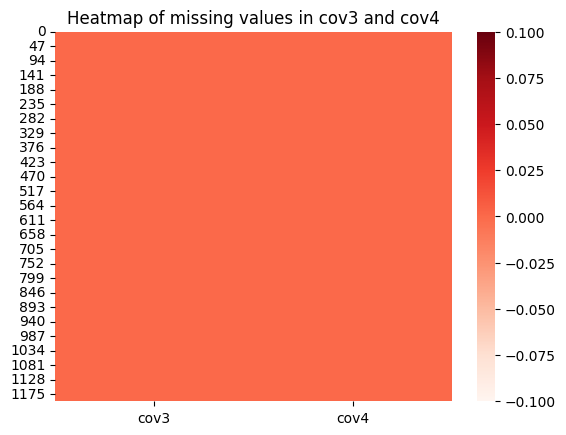

Duplicate rows:		56

Interaction between cov3 and cov5


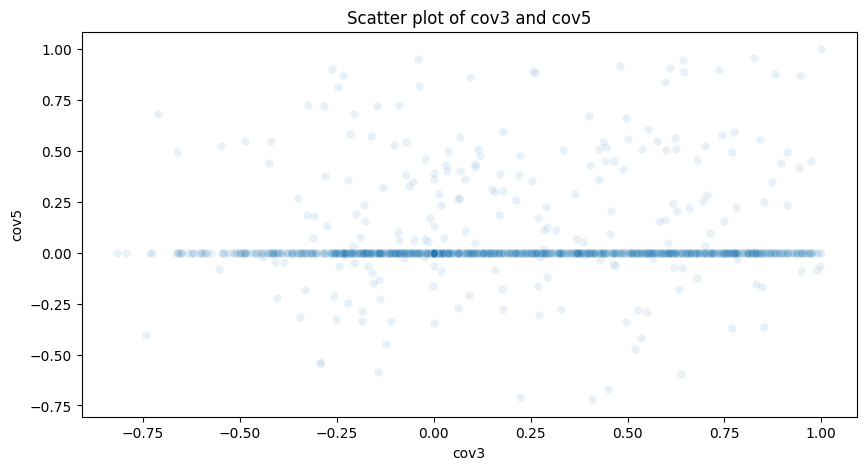

Correlation coefficients:
Spearman's correlation:	0.039
Pearson's correlation:	0.042
Kendall's correlation:	0.031
Missing values:
cov3    0
cov5    0
dtype: int64


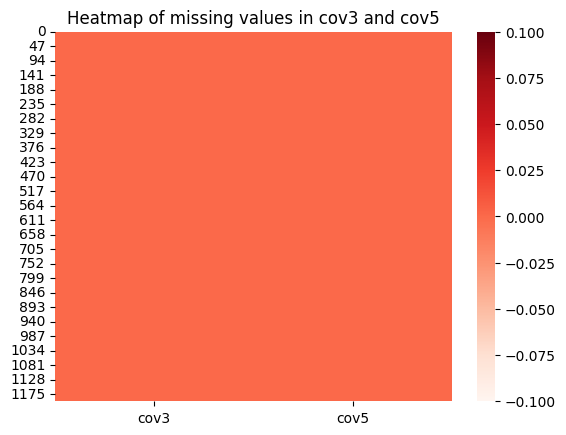

Duplicate rows:		51

Interaction between cov3 and cov6


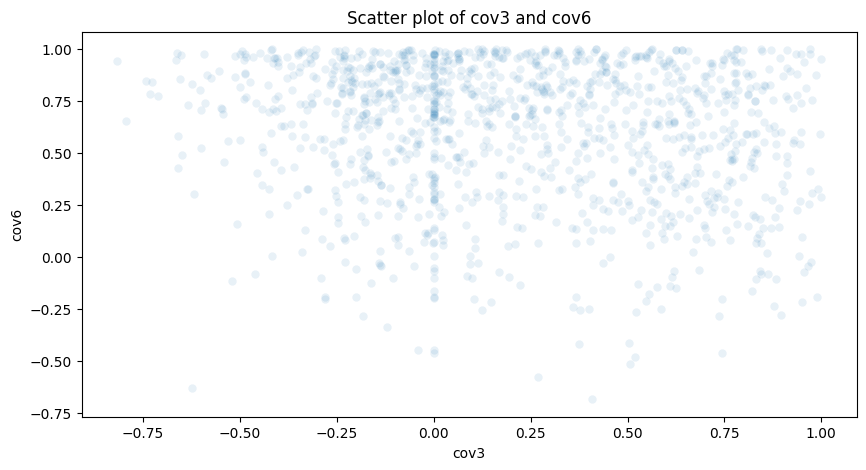

Correlation coefficients:
Spearman's correlation:	-0.137
Pearson's correlation:	-0.141
Kendall's correlation:	-0.092
Missing values:
cov3    0
cov6    0
dtype: int64


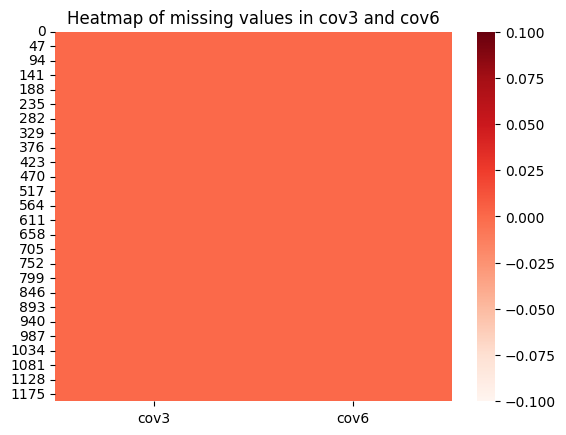

Duplicate rows:		0

Interaction between cov3 and cov7


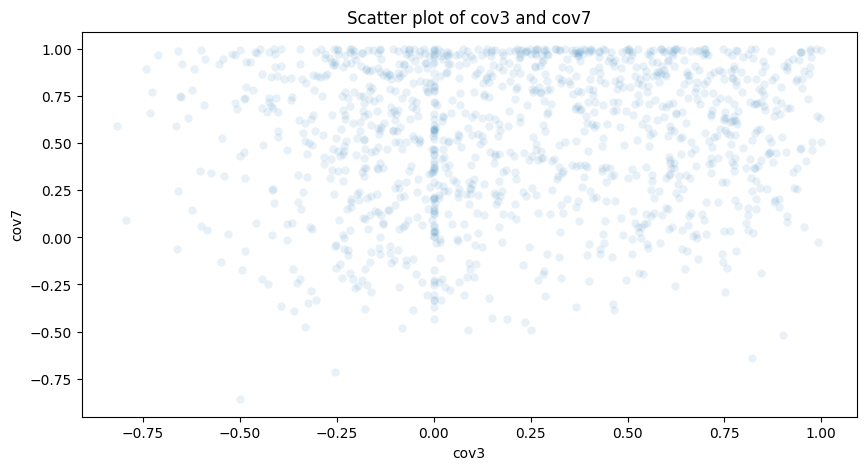

Correlation coefficients:
Spearman's correlation:	0.077
Pearson's correlation:	0.090
Kendall's correlation:	0.051
Missing values:
cov3    0
cov7    0
dtype: int64


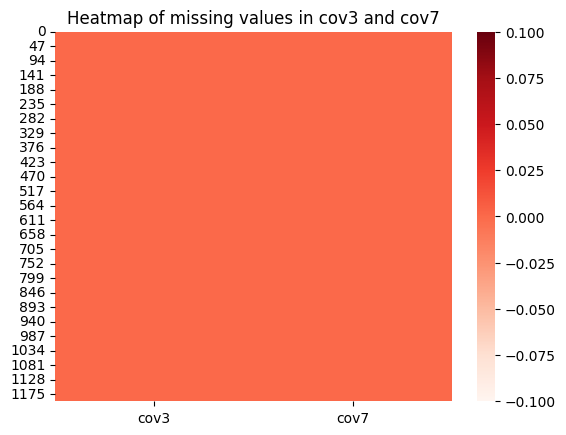

Duplicate rows:		0

Interaction between cov3 and sal_pur_rat


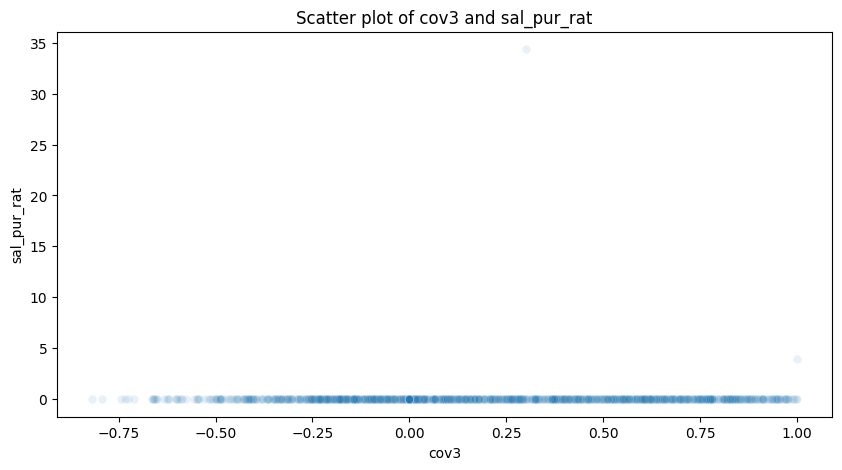

Correlation coefficients:
Spearman's correlation:	0.435
Pearson's correlation:	0.013
Kendall's correlation:	0.299
Missing values:
cov3           0
sal_pur_rat    0
dtype: int64


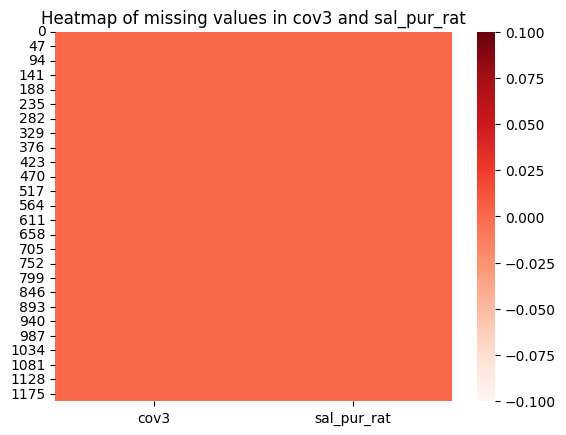

Duplicate rows:		0

Interaction between cov3 and igst_itc_tot_itc_rat


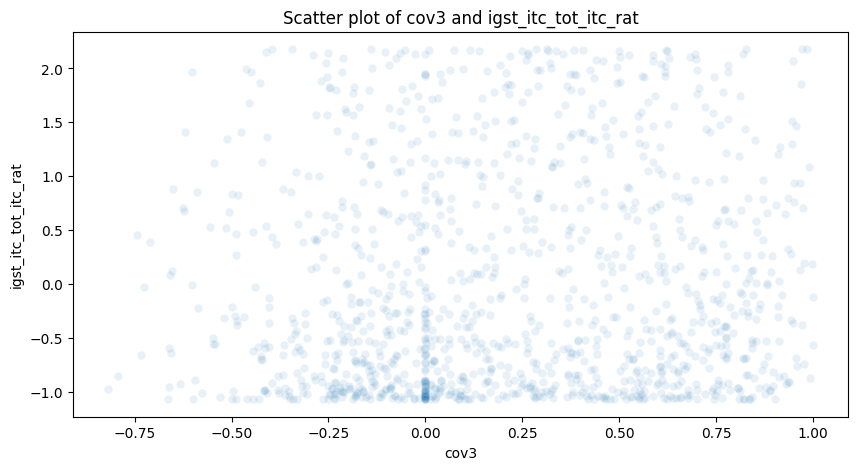

Correlation coefficients:
Spearman's correlation:	0.087
Pearson's correlation:	0.071
Kendall's correlation:	0.057
Missing values:
cov3                    0
igst_itc_tot_itc_rat    0
dtype: int64


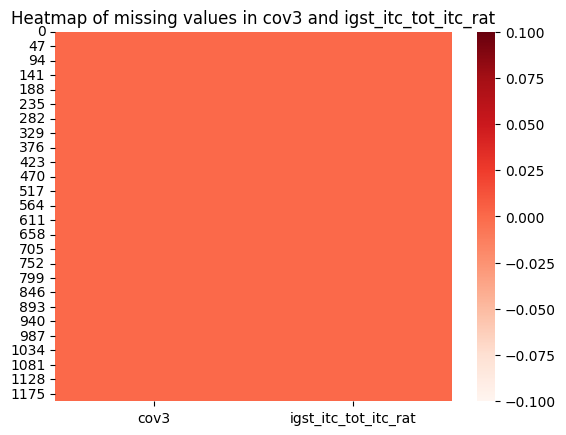

Duplicate rows:		0

Interaction between cov3 and lib_igst_itc_rat


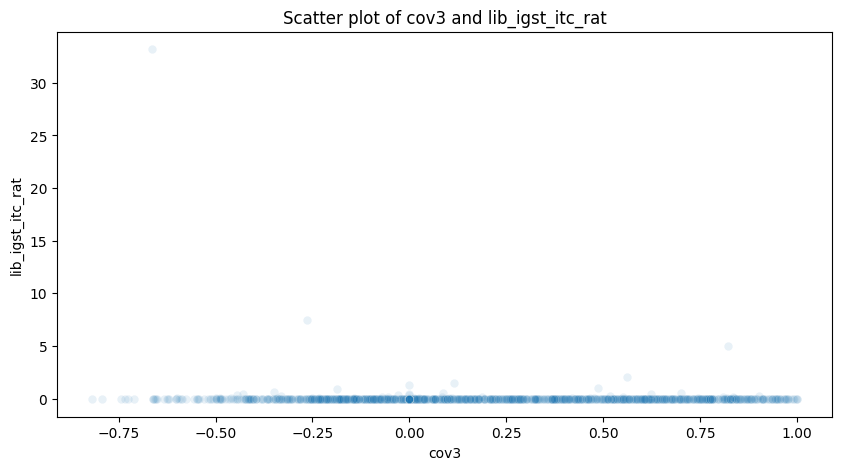

Correlation coefficients:
Spearman's correlation:	0.001
Pearson's correlation:	-0.062
Kendall's correlation:	0.001
Missing values:
cov3                0
lib_igst_itc_rat    0
dtype: int64


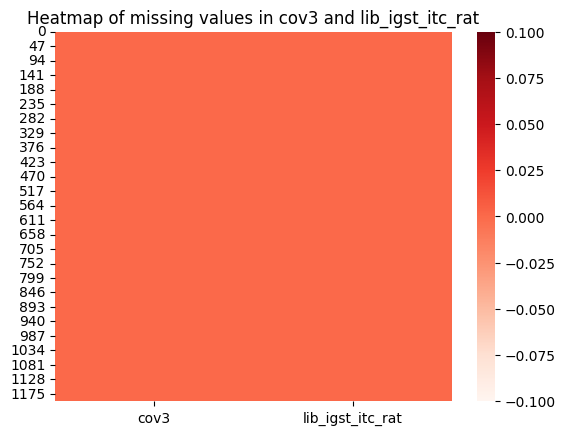

Duplicate rows:		0

Interaction between cov4 and cov5


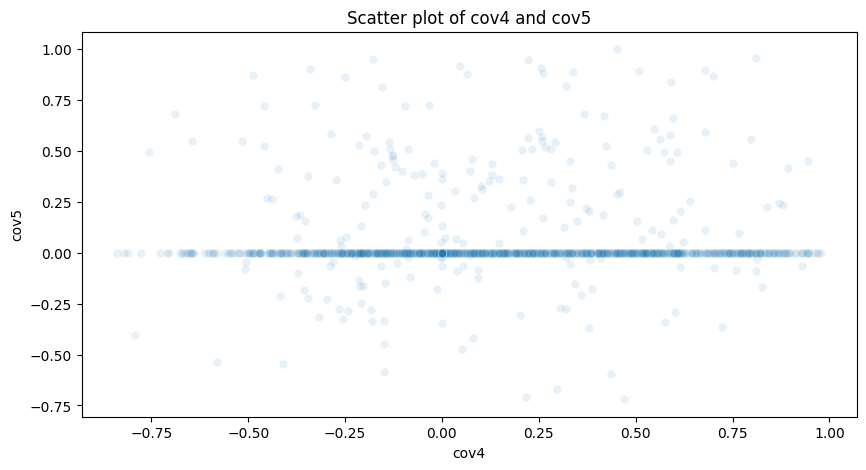

Correlation coefficients:
Spearman's correlation:	0.035
Pearson's correlation:	0.019
Kendall's correlation:	0.027
Missing values:
cov4    0
cov5    0
dtype: int64


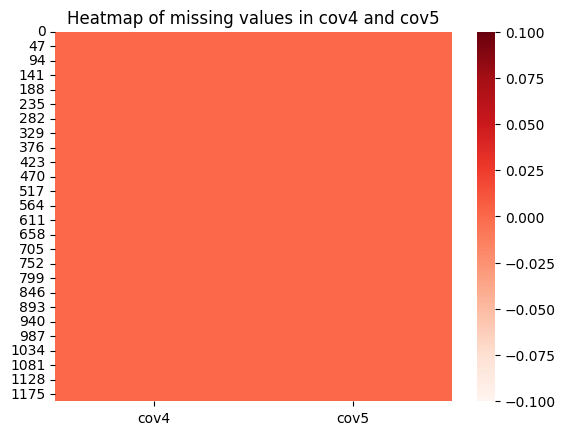

Duplicate rows:		52

Interaction between cov4 and cov6


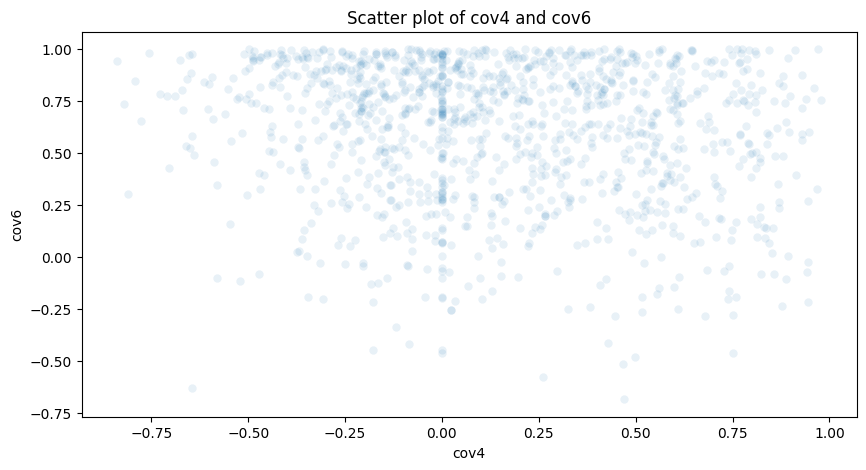

Correlation coefficients:
Spearman's correlation:	-0.136
Pearson's correlation:	-0.136
Kendall's correlation:	-0.092
Missing values:
cov4    0
cov6    0
dtype: int64


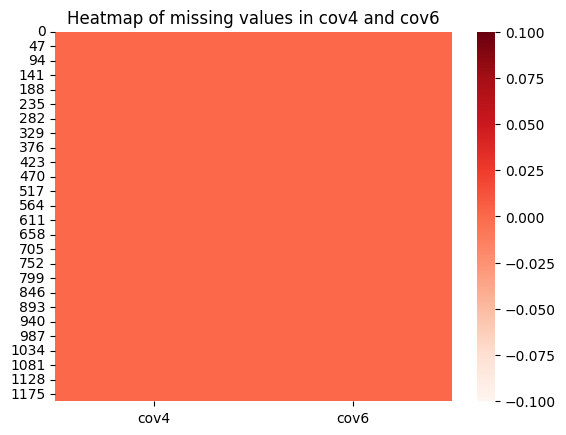

Duplicate rows:		0

Interaction between cov4 and cov7


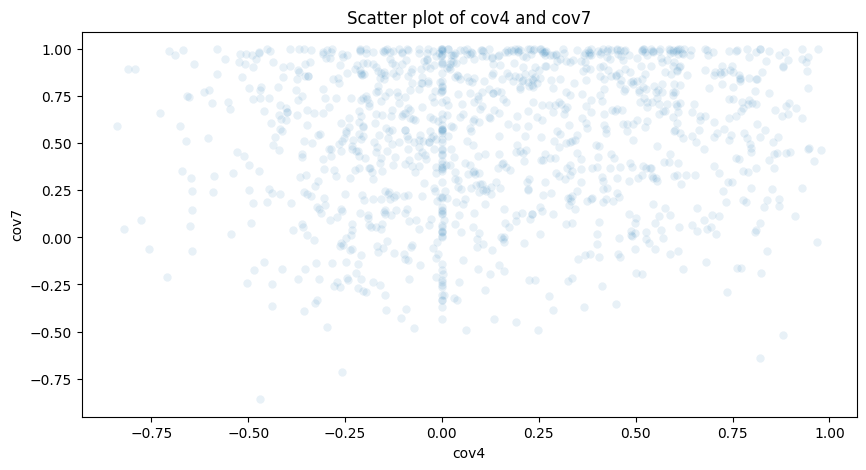

Correlation coefficients:
Spearman's correlation:	0.107
Pearson's correlation:	0.106
Kendall's correlation:	0.071
Missing values:
cov4    0
cov7    0
dtype: int64


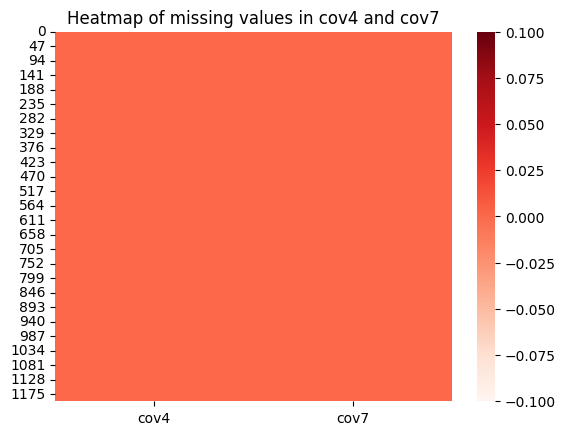

Duplicate rows:		0

Interaction between cov4 and sal_pur_rat


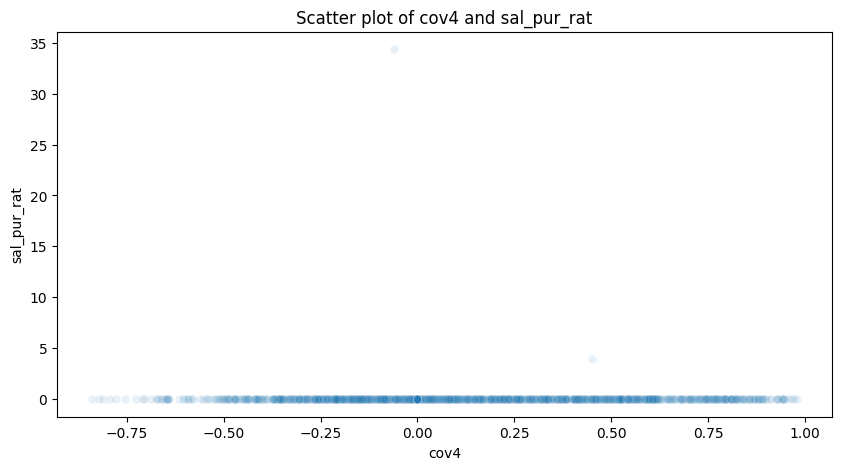

Correlation coefficients:
Spearman's correlation:	0.332
Pearson's correlation:	-0.012
Kendall's correlation:	0.223
Missing values:
cov4           0
sal_pur_rat    0
dtype: int64


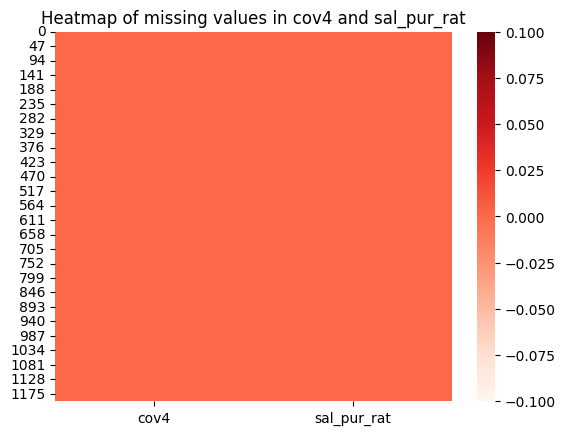

Duplicate rows:		0

Interaction between cov4 and igst_itc_tot_itc_rat


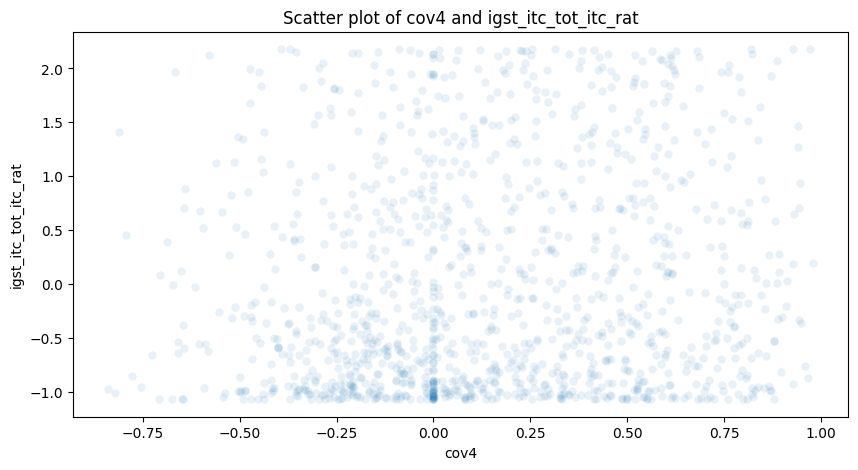

Correlation coefficients:
Spearman's correlation:	0.123
Pearson's correlation:	0.117
Kendall's correlation:	0.081
Missing values:
cov4                    0
igst_itc_tot_itc_rat    0
dtype: int64


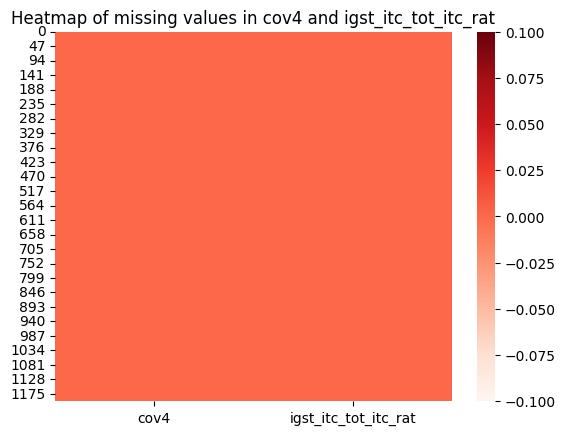

Duplicate rows:		0

Interaction between cov4 and lib_igst_itc_rat


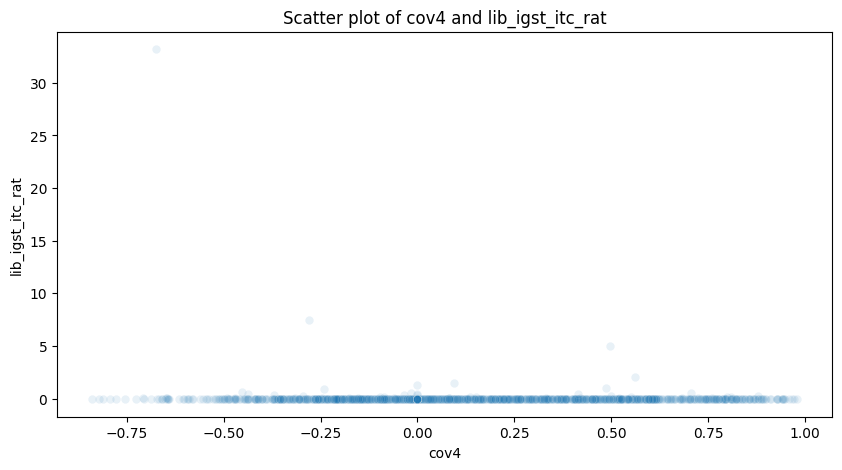

Correlation coefficients:
Spearman's correlation:	-0.051
Pearson's correlation:	-0.062
Kendall's correlation:	-0.033
Missing values:
cov4                0
lib_igst_itc_rat    0
dtype: int64


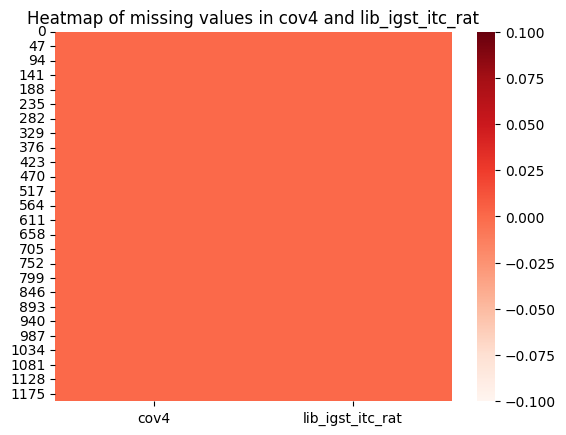

Duplicate rows:		0

Interaction between cov5 and cov6


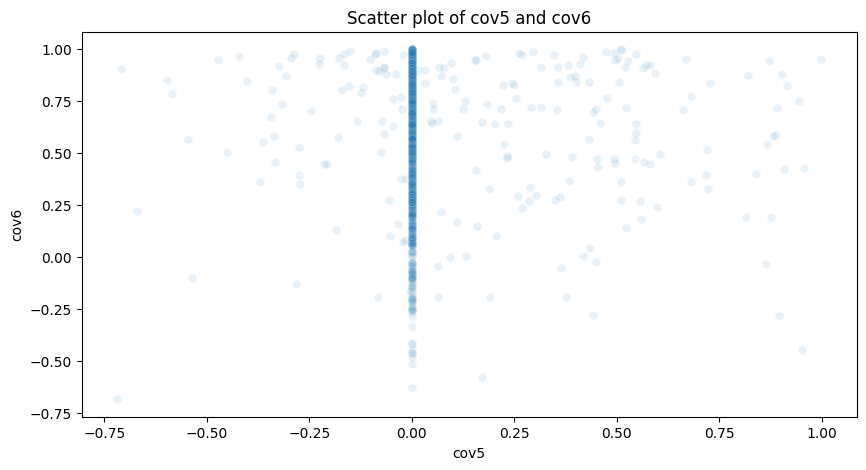

Correlation coefficients:
Spearman's correlation:	-0.033
Pearson's correlation:	-0.027
Kendall's correlation:	-0.025
Missing values:
cov5    0
cov6    0
dtype: int64


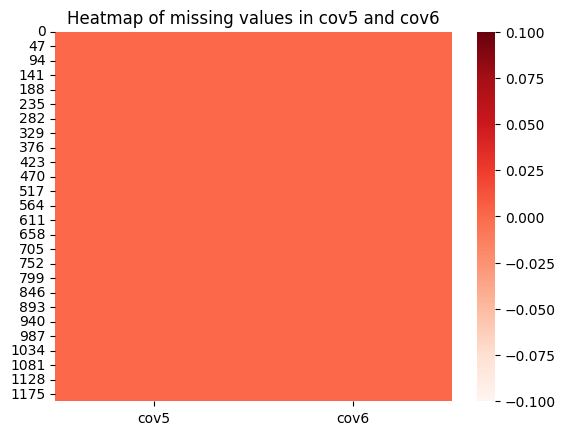

Duplicate rows:		0

Interaction between cov5 and cov7


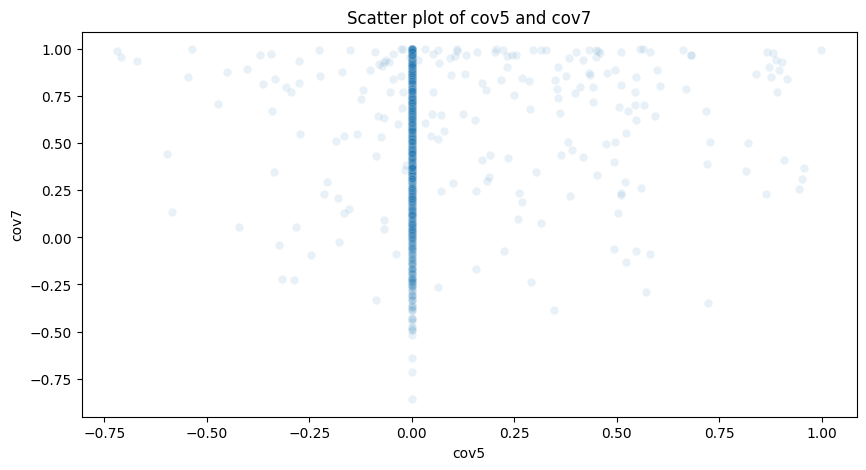

Correlation coefficients:
Spearman's correlation:	0.058
Pearson's correlation:	0.059
Kendall's correlation:	0.045
Missing values:
cov5    0
cov7    0
dtype: int64


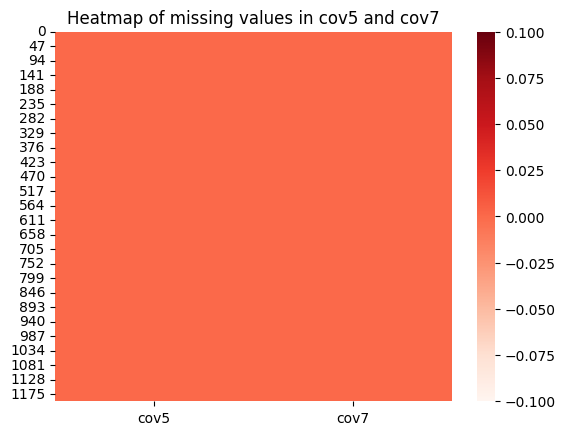

Duplicate rows:		6

Interaction between cov5 and sal_pur_rat


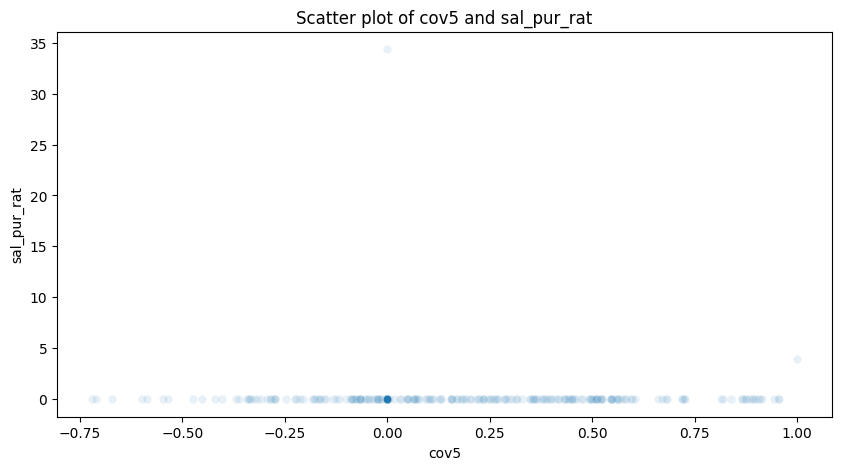

Correlation coefficients:
Spearman's correlation:	0.136
Pearson's correlation:	0.012
Kendall's correlation:	0.107
Missing values:
cov5           0
sal_pur_rat    0
dtype: int64


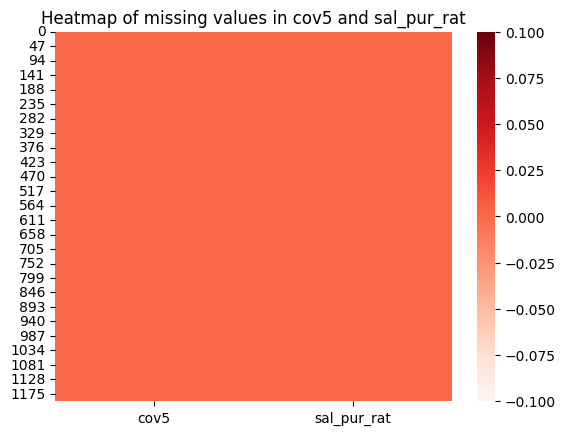

Duplicate rows:		1

Interaction between cov5 and igst_itc_tot_itc_rat


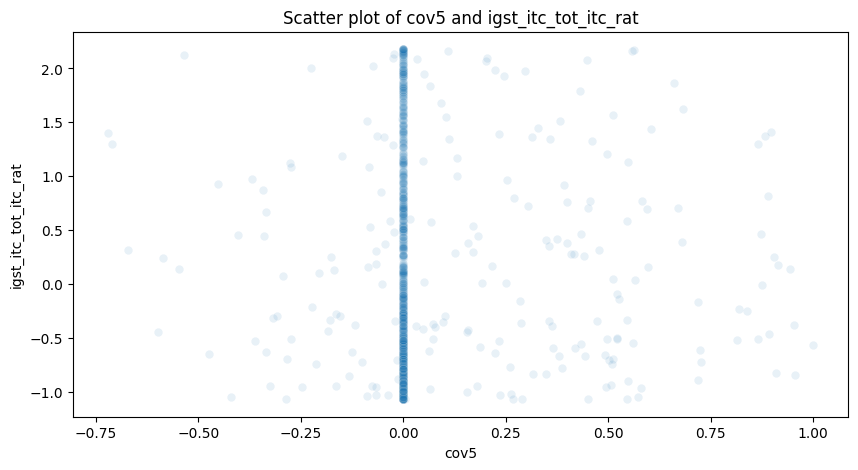

Correlation coefficients:
Spearman's correlation:	0.049
Pearson's correlation:	0.029
Kendall's correlation:	0.038
Missing values:
cov5                    0
igst_itc_tot_itc_rat    0
dtype: int64


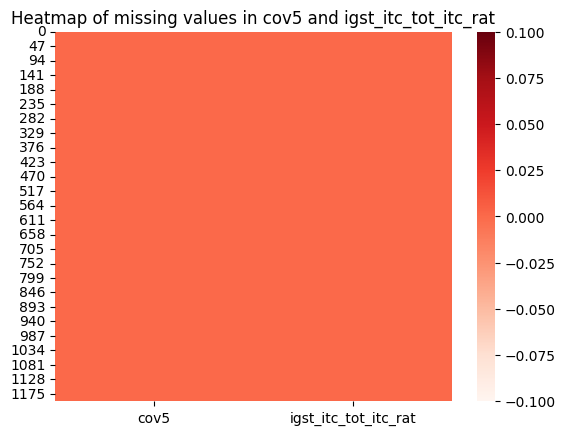

Duplicate rows:		5

Interaction between cov5 and lib_igst_itc_rat


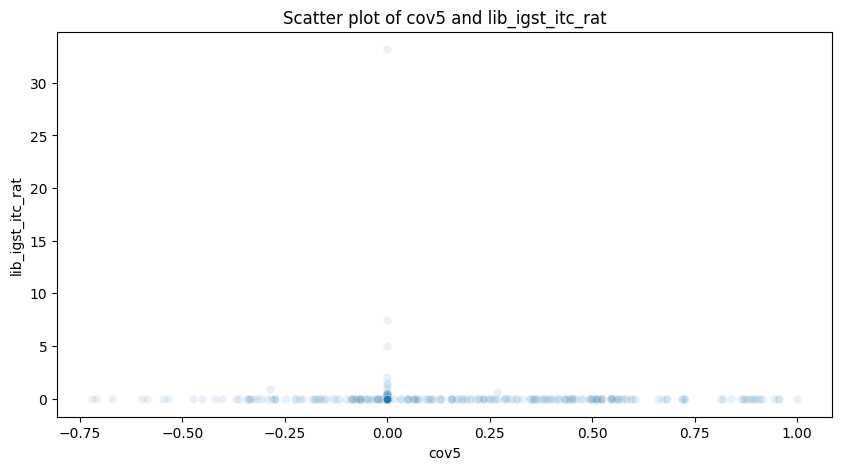

Correlation coefficients:
Spearman's correlation:	-0.042
Pearson's correlation:	-0.011
Kendall's correlation:	-0.033
Missing values:
cov5                0
lib_igst_itc_rat    0
dtype: int64


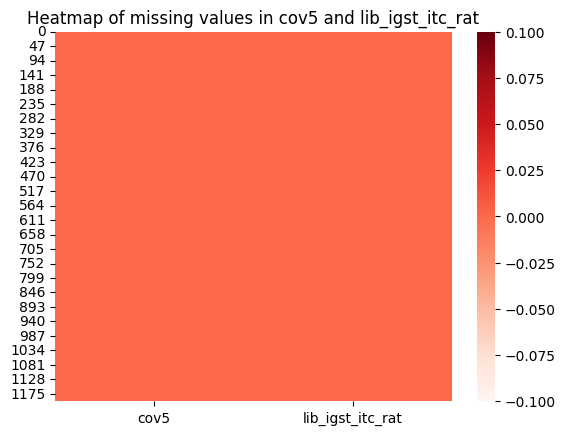

Duplicate rows:		0

Interaction between cov6 and cov7


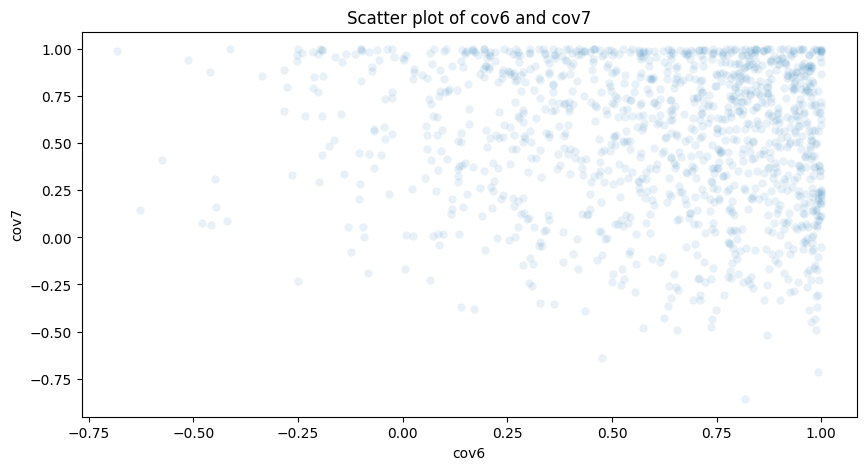

Correlation coefficients:
Spearman's correlation:	-0.121
Pearson's correlation:	-0.114
Kendall's correlation:	-0.081
Missing values:
cov6    0
cov7    0
dtype: int64


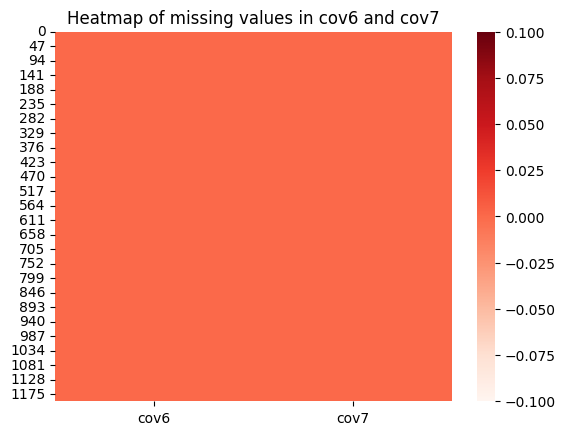

Duplicate rows:		0

Interaction between cov6 and sal_pur_rat


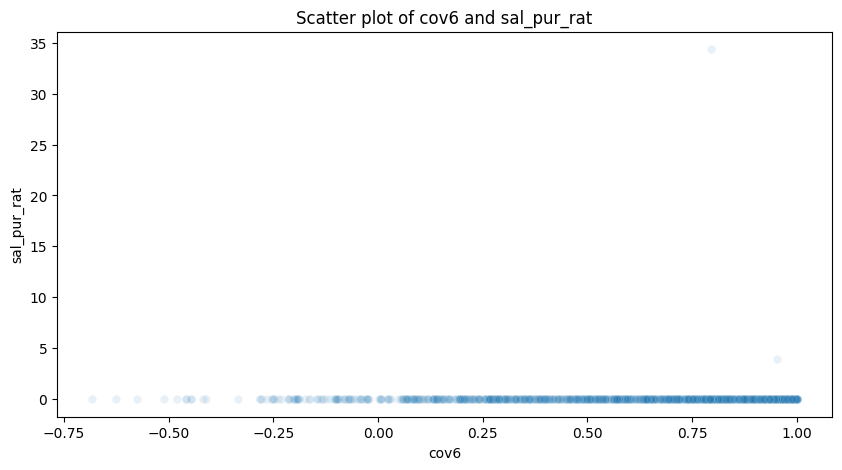

Correlation coefficients:
Spearman's correlation:	-0.116
Pearson's correlation:	0.020
Kendall's correlation:	-0.077
Missing values:
cov6           0
sal_pur_rat    0
dtype: int64


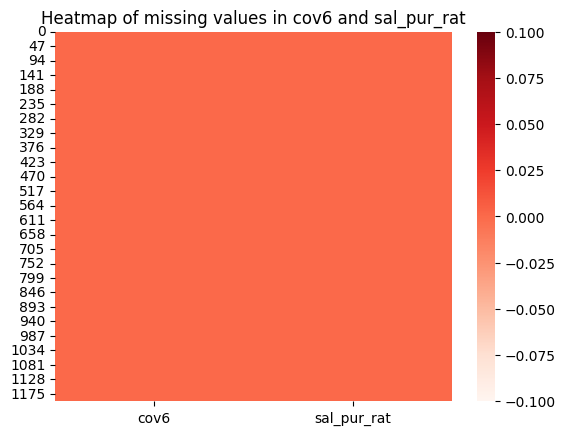

Duplicate rows:		0

Interaction between cov6 and igst_itc_tot_itc_rat


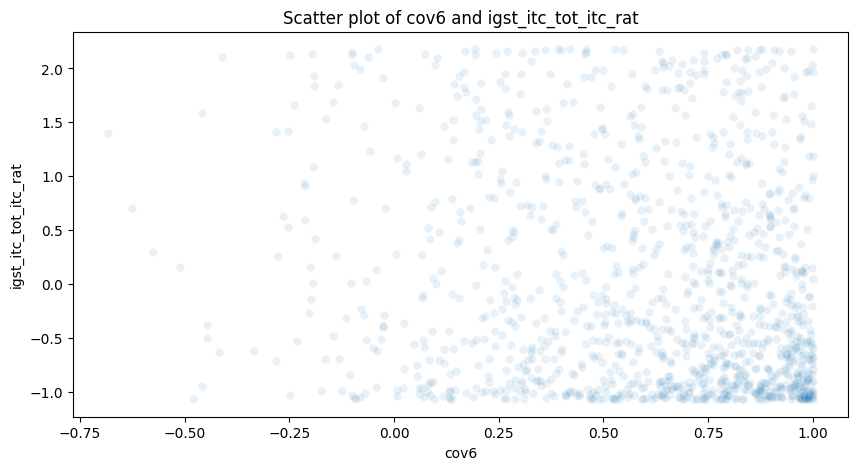

Correlation coefficients:
Spearman's correlation:	-0.166
Pearson's correlation:	-0.161
Kendall's correlation:	-0.112
Missing values:
cov6                    0
igst_itc_tot_itc_rat    0
dtype: int64


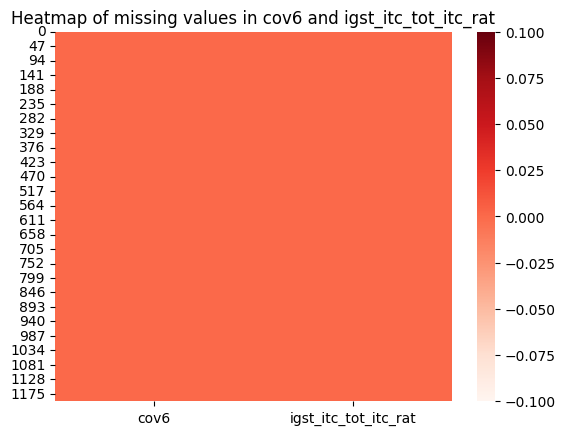

Duplicate rows:		0

Interaction between cov6 and lib_igst_itc_rat


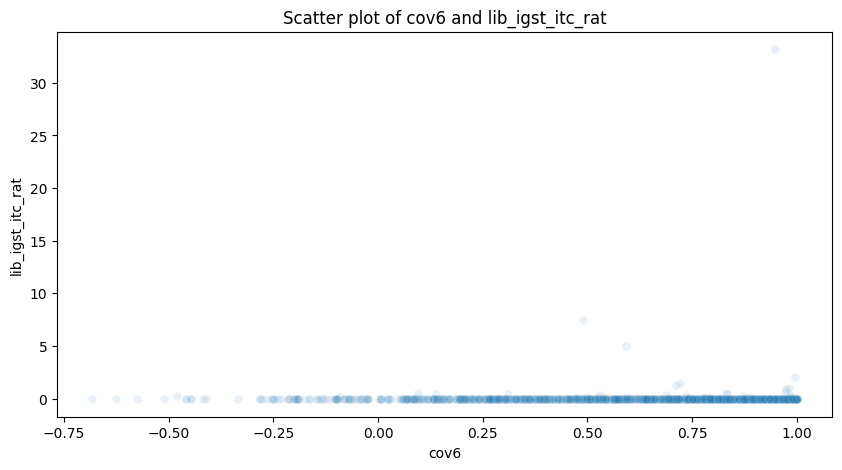

Correlation coefficients:
Spearman's correlation:	0.144
Pearson's correlation:	0.032
Kendall's correlation:	0.097
Missing values:
cov6                0
lib_igst_itc_rat    0
dtype: int64


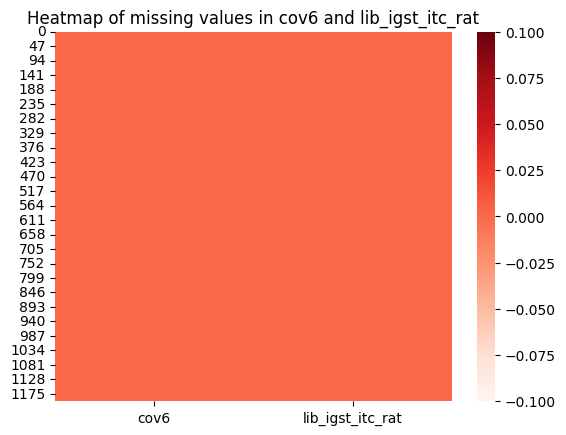

Duplicate rows:		0

Interaction between cov7 and sal_pur_rat


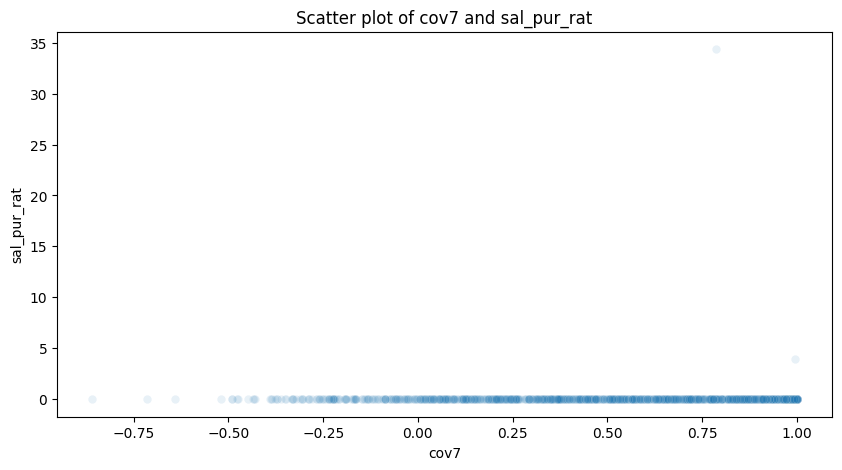

Correlation coefficients:
Spearman's correlation:	0.029
Pearson's correlation:	0.024
Kendall's correlation:	0.020
Missing values:
cov7           0
sal_pur_rat    0
dtype: int64


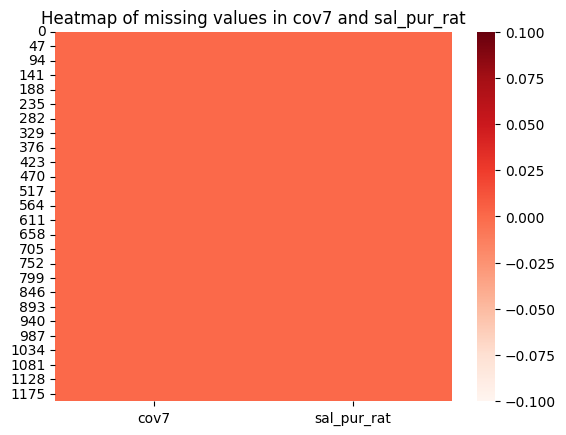

Duplicate rows:		0

Interaction between cov7 and igst_itc_tot_itc_rat


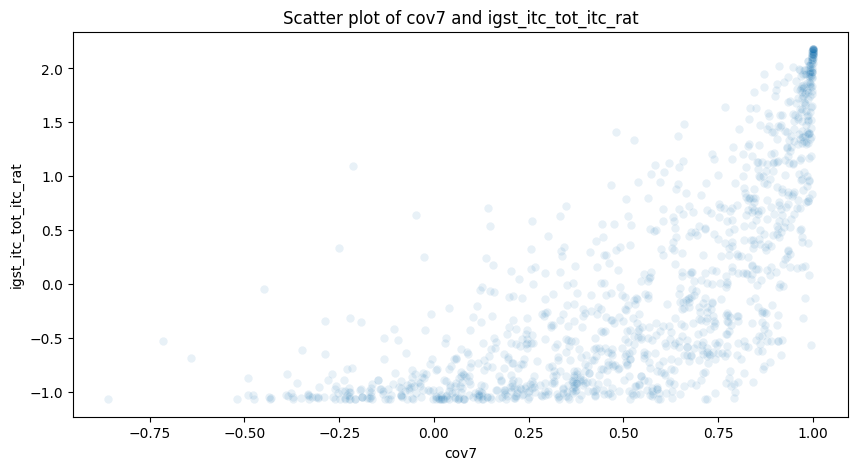

Correlation coefficients:
Spearman's correlation:	0.805
Pearson's correlation:	0.725
Kendall's correlation:	0.618
Missing values:
cov7                    0
igst_itc_tot_itc_rat    0
dtype: int64


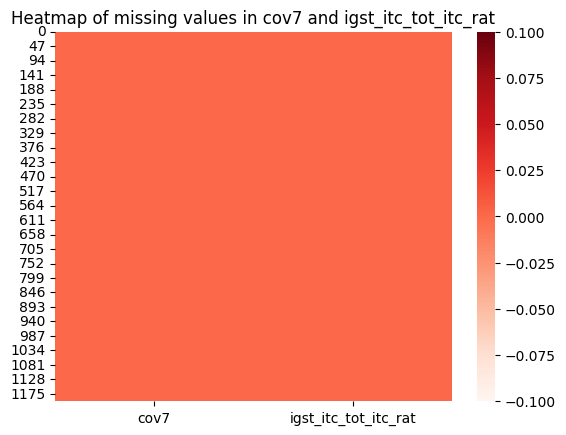

Duplicate rows:		5

Interaction between cov7 and lib_igst_itc_rat


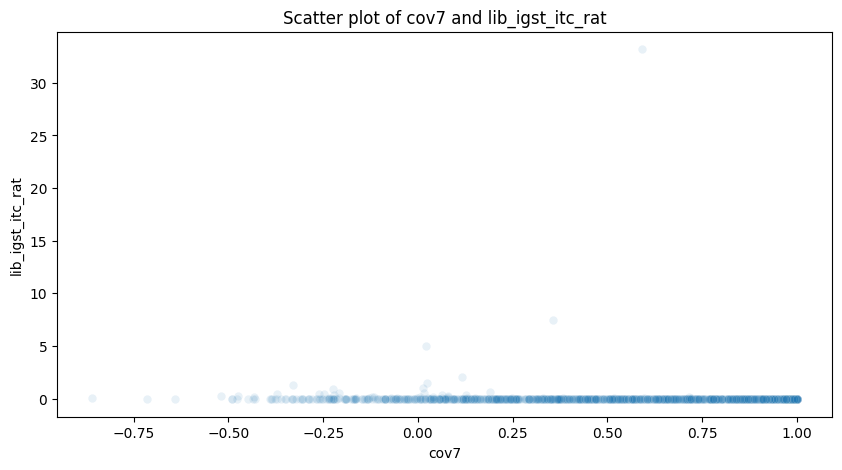

Correlation coefficients:
Spearman's correlation:	-0.789
Pearson's correlation:	-0.027
Kendall's correlation:	-0.597
Missing values:
cov7                0
lib_igst_itc_rat    0
dtype: int64


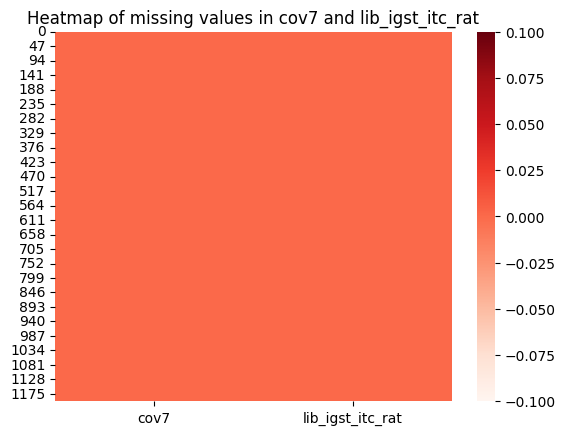

Duplicate rows:		0

Interaction between sal_pur_rat and igst_itc_tot_itc_rat


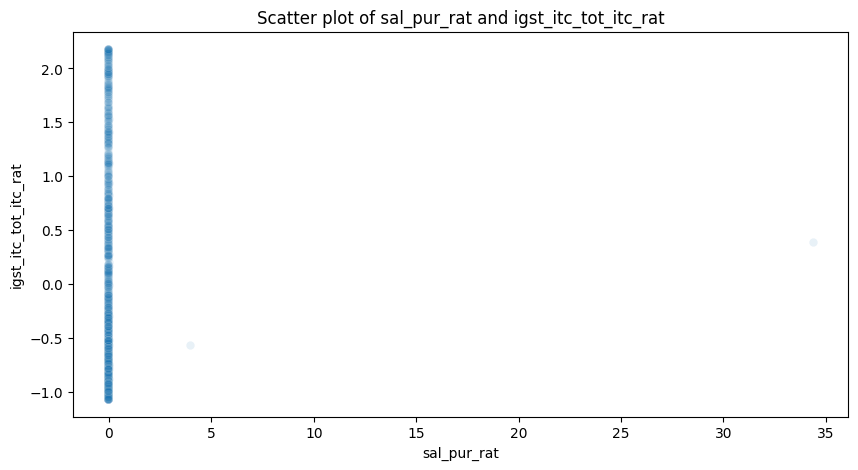

Correlation coefficients:
Spearman's correlation:	0.040
Pearson's correlation:	0.009
Kendall's correlation:	0.026
Missing values:
sal_pur_rat             0
igst_itc_tot_itc_rat    0
dtype: int64


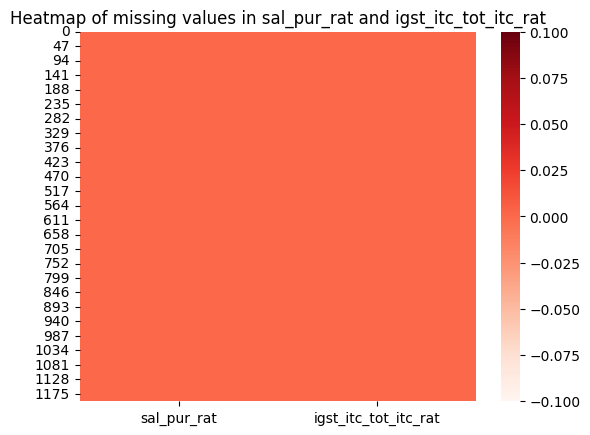

Duplicate rows:		0

Interaction between sal_pur_rat and lib_igst_itc_rat


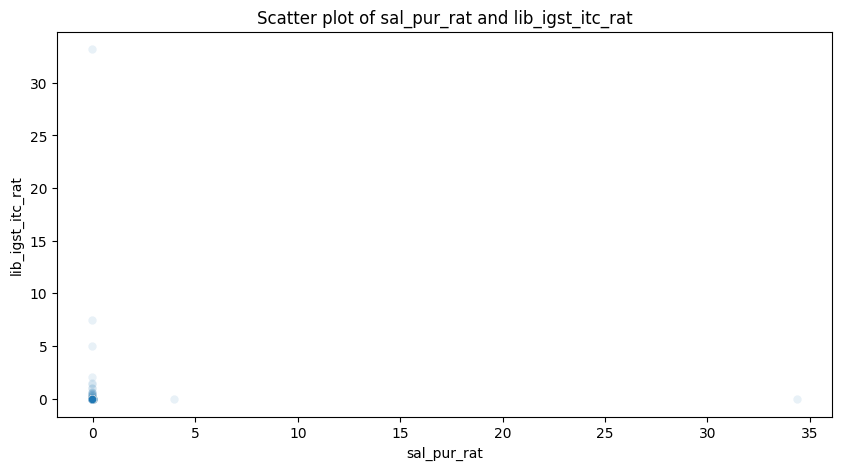

Correlation coefficients:
Spearman's correlation:	0.089
Pearson's correlation:	-0.002
Kendall's correlation:	0.062
Missing values:
sal_pur_rat         0
lib_igst_itc_rat    0
dtype: int64


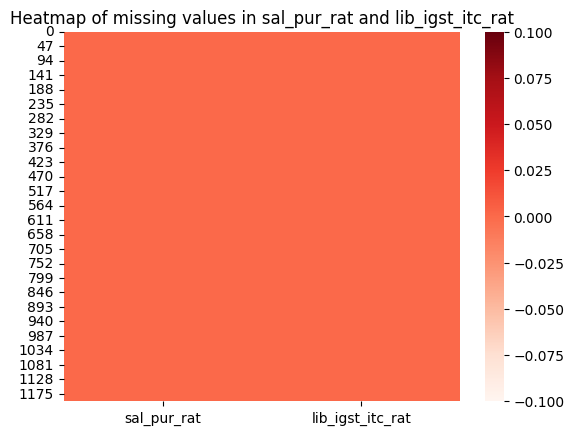

Duplicate rows:		0

Interaction between igst_itc_tot_itc_rat and lib_igst_itc_rat


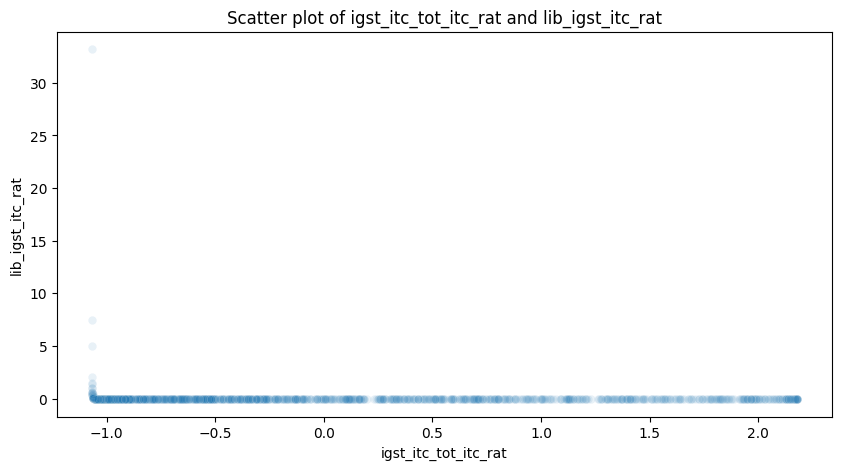

Correlation coefficients:
Spearman's correlation:	-0.979
Pearson's correlation:	-0.058
Kendall's correlation:	-0.892
Missing values:
igst_itc_tot_itc_rat    0
lib_igst_itc_rat        0
dtype: int64


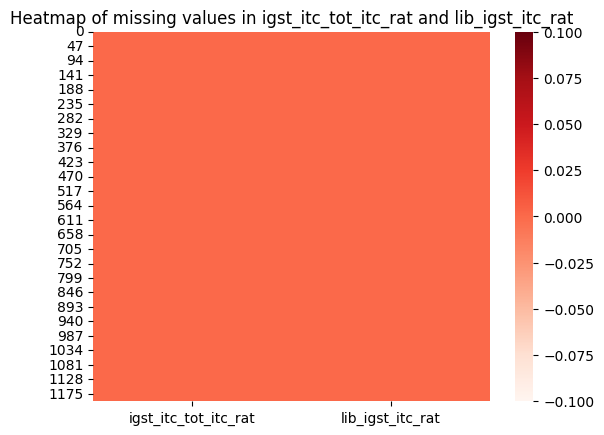

Duplicate rows:		0



In [5]:
# Interactions between 2 columns
for i in range(len(dataset.columns) - 1):
    for j in range(i + 1, len(dataset.columns)):
        col1, col2 = dataset.columns[i], dataset.columns[j]
        print(f"Interaction between {col1} and {col2}")
        
        # Scatter plot
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=col1, y=col2, data=dataset, alpha=0.1)
        plt.title(f"Scatter plot of {col1} and {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

        # Correlation coefficients
        print("Correlation coefficients:")
        corr_spearman = dataset[[col1, col2]].corr(method="spearman").iloc[0, 1]
        print(f"Spearman's correlation:\t{corr_spearman:.3f}")
        corr_pearson = dataset[[col1, col2]].corr(method="pearson").iloc[0, 1]
        print(f"Pearson's correlation:\t{corr_pearson:.3f}")
        corr_kendall = dataset[[col1, col2]].corr(method="kendall").iloc[0, 1]
        print(f"Kendall's correlation:\t{corr_kendall:.3f}")
        
        # Phi coefficient for categorical variables
        if len(dataset[col1].unique()) <= 2 and len(dataset[col2].unique()) <= 2:
            cont_table = pd.crosstab(dataset[col1], dataset[col2])
            phi_k = np.sqrt(cont_table.sum().sum() * cont_table.iloc[1, 1] * cont_table.iloc[0, 0] * cont_table.iloc[1, 0] /
                              (cont_table.iloc[0, 1] * cont_table.iloc[1, 0] * cont_table.iloc[0, 0] * cont_table.iloc[1, 1]))
            print(f"Phi coefficient:\t\t{phi_k:.3f}")
            
        # Missing values
        print(f"Missing values:")
        print(dataset[[col1, col2]].isna().sum())
        sns.heatmap(dataset[[col1, col2]].isna(), cmap="Reds")
        plt.title(f"Heatmap of missing values in {col1} and {col2}")
        plt.show()
        
        # Duplicate rows
        print(f"Duplicate rows:\t\t{dataset.duplicated([col1, col2]).sum()}\n")

# $\textbf{Algorithm and Results}$

In [6]:
scaler = StandardScaler() 
normalized_dataset = normalize(scaler.fit_transform(dataset))

In [7]:
def cosine_similarity(a,b):
  return (a@b)/(np.linalg.norm(a)*np.linalg.norm(b))

distance_matrix = np.zeros((len(normalized_dataset),len(normalized_dataset)))

for i in range(len(distance_matrix)):
  for j in range(len(distance_matrix[0])):
    distance_matrix[i,j] = 1 - cosine_similarity(normalized_dataset[i],normalized_dataset[j])

distance_matrix = np.abs(np.round(distance_matrix,8))
print(distance_matrix)

[[0.         1.12632742 0.91687306 ... 0.8557374  1.68626876 1.38495024]
 [1.12632742 0.         1.18454689 ... 0.31107118 0.70990299 0.49683548]
 [0.91687306 1.18454689 0.         ... 1.00950267 1.56987466 1.31696588]
 ...
 [0.8557374  0.31107118 1.00950267 ... 0.         1.20728647 0.43905239]
 [1.68626876 0.70990299 1.56987466 ... 1.20728647 0.         0.70487884]
 [1.38495024 0.49683548 1.31696588 ... 0.43905239 0.70487884 0.        ]]


In [8]:
k = 10
A = np.zeros((len(normalized_dataset),len(normalized_dataset)))

#Mutual-kNN
for i in range(len(distance_matrix)):
  k_nearest_neighbours_indices_i = np.argsort(distance_matrix[i])[:k]
  for j in k_nearest_neighbours_indices_i:
    k_nearest_neighbours_indices_j = np.argsort(distance_matrix[j])[:k]
    if i in k_nearest_neighbours_indices_j:
      A[i,j] = 1
    else:
      A[i,j] = 0

D = np.diag(np.sum(A,axis=1))
L = D - A
D_inverse_square_root = np.sqrt(np.linalg.inv(D))
#L_hat = D_inverse_square_root @ L @ D_inverse_square_root
L_hat = np.eye(len(A)) - (D_inverse_square_root @ A @ D_inverse_square_root)

In [10]:
from sklearn.cluster import KMeans

K = 4

eigenvalues,V = np.linalg.eigh(L_hat)
V_new = V[:,np.argsort(eigenvalues)[1:K]]

KMeans_model = KMeans(n_clusters = K,n_init = 10)
KMeans_model.fit(V_new)
labels = KMeans_model.labels_

In [11]:
d = {}
for i in range(len(normalized_dataset)):
  d[i] = labels[i]

unique_labels = set(labels)
for l in unique_labels:
  points = [k for k,v in d.items() if v == l]
  print(f'Cluster {l} ({len(points)}) :',points)

Cluster 0 (1178) : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

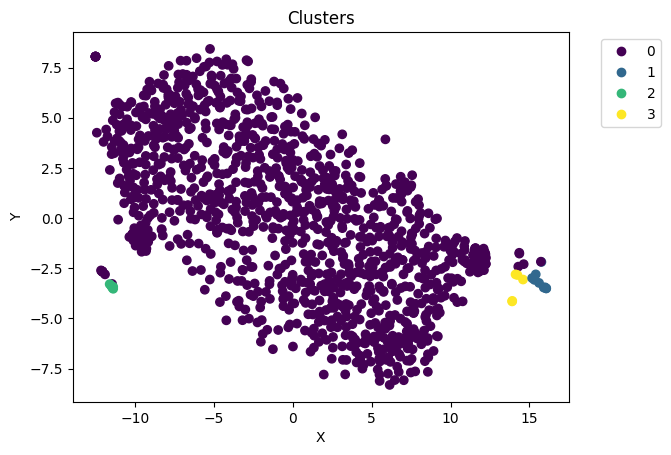

In [12]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components = 2)
dataset_embedded = tsne_model.fit_transform(V_new)

#Plotting the clusters
scatter = plt.scatter(dataset_embedded[:,0], dataset_embedded[:,1], c = labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clusters")
plt.legend(*scatter.legend_elements(),loc="upper right",bbox_to_anchor=(1.2,1))
plt.show()

### $\textbf{References}$
- $\href{https://towardsdatascience.com/spectral-clustering-aba2640c0d5b}{\text{Blog on Spectral Clustering}}$
- $\href{https://en.wikipedia.org/wiki/Spectral_clustering}{\text{Spectral Clustering Wikipedia}}$